<a href="https://colab.research.google.com/github/Malathy-Lata/Cardiovascular-Risk-Prediction_Classification_ML/blob/main/S_Malathy_Lata_Cardiovascular_Risk_Prediction_Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title: Cardiovascular Risk Prediction**

**Project Type:** Classification

**Contribution:** Individual

**Name:** Sabbavarapu Malathy Lata

#**Project Summary**

Cardiovascular diseases (CVDs) are one of the major cause of mortality worldwide. According to American Heart Association, in 2020, 19.1 million people died from CVDs, globally.
Since most CVDs can be prevented with behavioral changes and following certain necessary precautions, accurate prediction of the future risk of heart disease becomes crucial. This will either help prevent the disease or early detection which in turn allows better management of the disease with counseling and medical therapy.

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future Coronary Heart Disease (CHD).

**Prediction model Summary:**
1. 6 Machine Learning models were used to train the dataset, and to improve the model performance hyperparameter tuning was used.

2. To build the models, missing values and multicollinearity were handled, feature engineering and feature selection was performed, and the training dataset was oversampled using SMOTE to reduce bias on outcome.

3. Recall was chosen as the model evaluation metric because it is essential to reduce the false negatives in our prediction.

4. The set of predictions obtained were by using logistic regression model, K Nearest neighbors, Naive Bayes, Decision Tree, Support Vector Machines, and XG Boost.

#**Github Link**

https://github.com/Malathy-Lata/Cardiovascular-Risk-Prediction_Classification_ML

#**Problem Statement**

## **Problem description**

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patient's information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are demographic, behavioral, and medical risk factors.

## **Data Description**

### The dataset contains information regarding the following demographic, behavioral, and medical risk factors pertaining to the 10-year study of analysisng the risk of various factors on incidence of CHD.

### **Demographic Attributes:**
* ### age: Age of the patient
* ### education: Education level of the patient
* ### sex: Gender of the patient

### **Behavioral Attributes:**
* ### is_smoking: Whether the patient is currently smoking or not
* ### CigsPerDay: Number of cigarettes smoked per day by the patients

### **Medical (Past) Attributes:**
* ### Prevalent Stroke: Whether the patient has a previous history of stroke or not
* ### Prevalent hyp: Whether the patient has a previous history of hypertension or not

### **Medical (Current) Attributes:**
* ### BMI: Body Mass Index of the patient
* ### Daibetes: Whether the patient is diabetic or non-diabetic
* ### Glucose: Glucose levels of the patients
* ### Tol Chol: The total cholesterol values of the patients
* ### BP_Meds: Whether the patient is currently on BP medication or not
* ### Sys BP: The systolic blood pressure of the patient
* ### Dia BP: The diastolic blood pressure of the patient
* ### Heart Rate: Measure of heart rate of the patient

### **Target Attributes:**
* ### TenYearCHD: The incidence of CHD

#**Let's Begin**

##**Know your Data**

In [354]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

In [355]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [356]:
#Loading the dataset
cv_risk_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Capstone Project- 3/data_cardiovascular_risk.csv')

In [357]:
#First 5 rows of the dataset
cv_risk_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [358]:
#Last 5 rows of the dataset
cv_risk_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [359]:
#Shape of the dataset
cv_risk_df.shape

(3390, 17)

The dataset consists of 3390 rows and 17 columns.

In [360]:
#Column names of the dataset
cv_risk_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [361]:
#Basic information of the dataset
cv_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The data consists of null values, and various datatypes including int64, float64, and object types.

In [362]:
#Knowing the null values of the dataset
cv_risk_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Among the total columns, education, cigsPerDay, BPMeds, totchol, BMI, heartrate, and glucose consists of 87, 22, 44, 38, 14, 1, and 304 null values, respectively.

In [363]:
#Checking for duplicated values
cv_risk_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3385    False
3386    False
3387    False
3388    False
3389    False
Length: 3390, dtype: bool

There are no duplicated values in the dataset.

##**Understanding the Variables**

In [364]:
#Describing various statistical features of the data
cv_risk_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [365]:
#Checking the number of unique values for each column
for i in cv_risk_df.columns:
  print(f"No. of unique values in {i} is {cv_risk_df[i].nunique()}")

No. of unique values in id is 3390
No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


In [366]:
#Unique values of column Education
cv_risk_df['education'].unique().tolist()

[2.0, 4.0, 1.0, 3.0, nan]

In [367]:
#Unique values of column Sex
cv_risk_df['sex'].unique().tolist()

['F', 'M']

In [368]:
#Unique values of column is_smoking
cv_risk_df['is_smoking'].unique().tolist()

['YES', 'NO']

In [369]:
#Unique values of column BPMeds
cv_risk_df['BPMeds'].unique().tolist()

[0.0, nan, 1.0]

In [370]:
#Unique values of column prevalentStroke
cv_risk_df['prevalentStroke'].unique().tolist()

[0, 1]

In [371]:
#Unique values of column diabetes
cv_risk_df['diabetes'].unique().tolist()

[0, 1]

In [372]:
#Unique values of column TenYearCHD
cv_risk_df['TenYearCHD'].unique().tolist()

[1, 0]

#**Data Wrangling**

In [373]:
#Dropping id column since it won't have any affect on the target
cv_risk_df=cv_risk_df.drop(['id'], axis=1)

In [374]:
#Renaming columns
cv_risk_df.rename(columns={'cigsPerDay':'cigs_per_day',
                           'BPMeds':'bp_meds',
                           'prevalentStroke':'prevalent_stroke',
                           'prevalentHyp':'prevalent_hyp',
                           'totChol':'total_cholesterol',
                           'sysBP':'systolic_bp',
                           'diaBP':'diastolic_bp',
                           'BMI':'bmi','heartRate':'heart_rate',
                           'TenYearCHD':'ten_year_chd'},
          inplace = True)

In [375]:
#Defining 3 lists containing the dependent, continuous, and categorical independent values based on the number of unique values for each attribute
dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [376]:
#Encoding the binary columns where male = 1 and female =0; smoking yes = 1 and not smoking = 0
cv_risk_df['sex'] = np.where(cv_risk_df['sex'] == 'M',1,0)
cv_risk_df['is_smoking'] = np.where(cv_risk_df['is_smoking'] == 'YES',1,0)

##**Handling Missing Values**

In [377]:
cv_risk_df.isna().sum()

age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

**For Education and BP medication columns**

In [378]:
cv_risk_df['education'].mode()
cv_risk_df['bp_meds'].mode()

0    0.0
Name: bp_meds, dtype: float64

In [379]:
#Replacing the missing values in the categorical columns with its mode
cv_risk_df['education'] = cv_risk_df['education'].fillna(cv_risk_df['education'].mode()[0])
cv_risk_df['bp_meds'] = cv_risk_df['bp_meds'].fillna(cv_risk_df['bp_meds'].mode()[0])

In [380]:
#education distribution after mode imputation
cv_risk_df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [381]:
#bp_meds distribution after mode imputation
cv_risk_df.bp_meds.value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

**For Cigarettes per Day**

In [382]:
#All missing values in the cigs_per_day column
cv_risk_df[cv_risk_df['cigs_per_day'].isna()]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [383]:
#mean and median number of cigarettes per day for a smoker (excluding non-smokers)
cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'].mean(), cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'].median()

(18.345945945945946, 20.0)

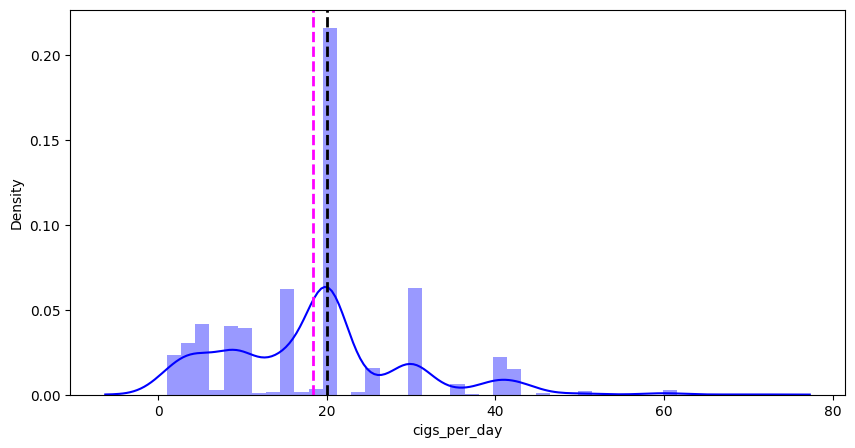

In [384]:
#distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
ax=sns.distplot(cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'],hist=True ,color="blue")
ax.axvline(cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

<Axes: >

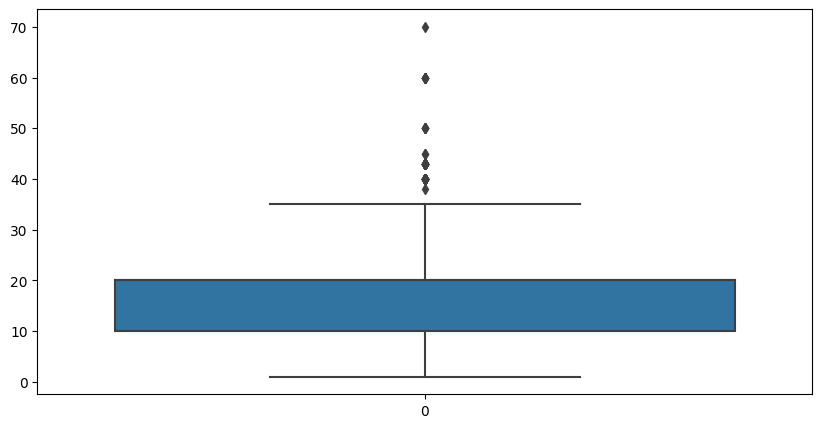

In [385]:
#box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.boxplot(cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'])

In [386]:
#Filling the missing cigarettes value for smokers with the median value of cigs per day column
cv_risk_df['cigs_per_day']= cv_risk_df['cigs_per_day'].fillna(cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'].median())

In [387]:
#Checking for any wrong entries where the patient is not a smoker
cv_risk_df[(cv_risk_df['is_smoking']==0) & (cv_risk_df['cigs_per_day']>0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd


There are no wrong entries with respect to non-smokers and number of cigarettes smoked per day.

In [388]:
#Checking for any wrong entries where the patient is a smoker
cv_risk_df[(cv_risk_df['is_smoking']==1) & (cv_risk_df['cigs_per_day']==0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd


There are no wrong entries with respect to smokers and number of cigarettes smoked per day.

**For total cholesterol, BMI, Heart Rate, and Glucose**

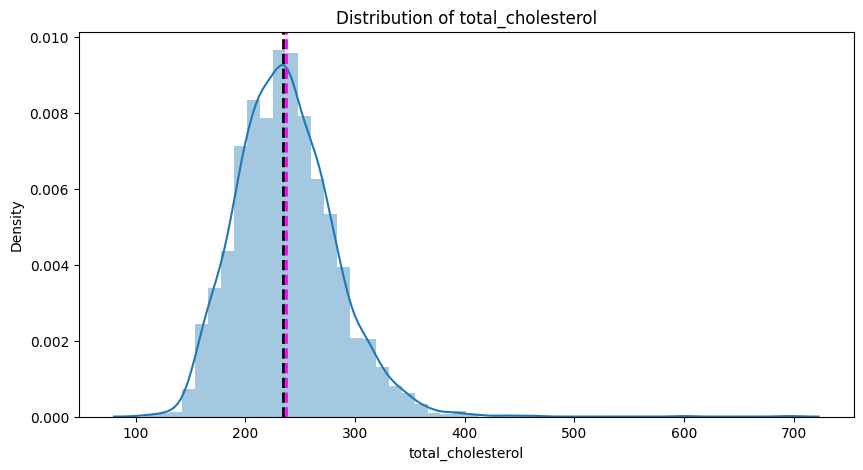

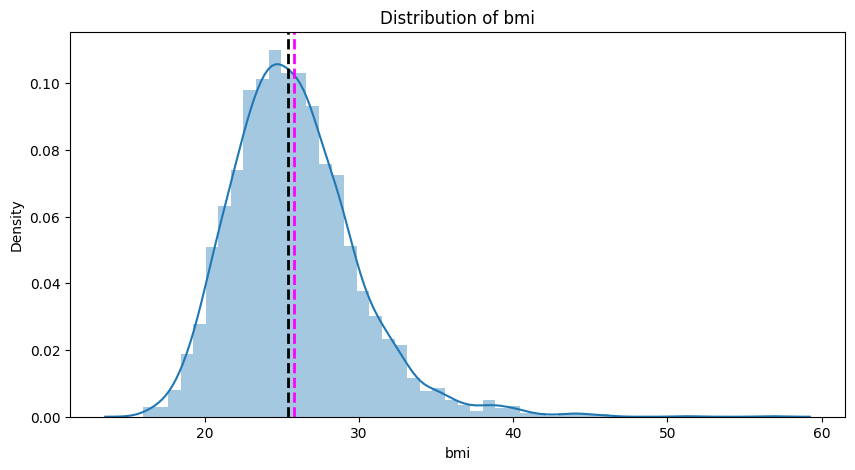

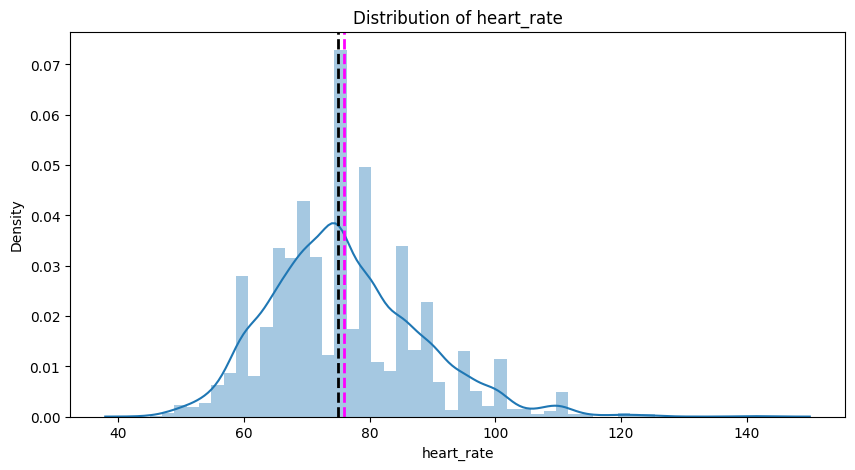

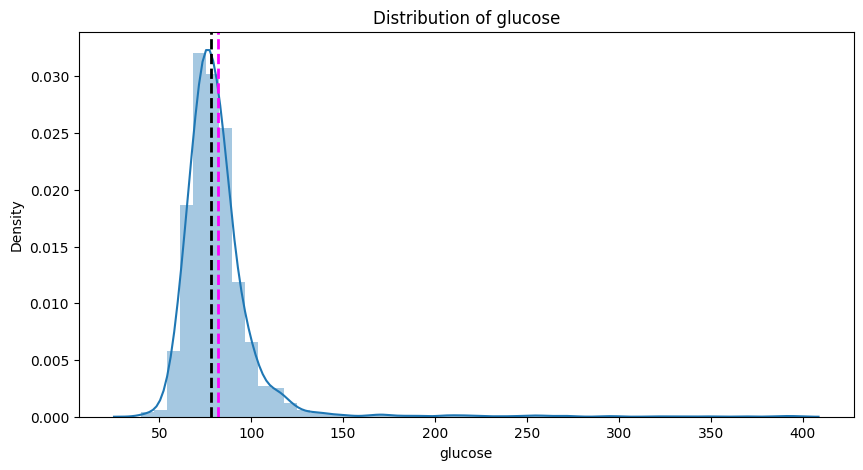

In [389]:
#Checking the distribution of the total cholesterol, bmi, heart rate, and glucose
for i in ['total_cholesterol','bmi','heart_rate', 'glucose']:
  plt.figure(figsize=(10,5))
  sns.distplot(cv_risk_df[i])
  plt.axvline(cv_risk_df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(cv_risk_df[i].median(), color='black', linestyle='dashed', linewidth=2)
  plt.title('Distribution of ' +i)
  plt.show()

The columns total cholesterol, BMI, heart rate and glucose are positively skewed. Lets check for the outliers

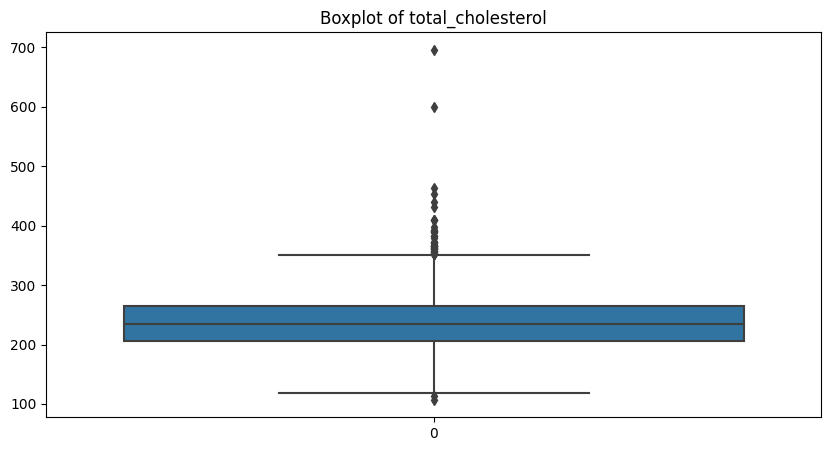

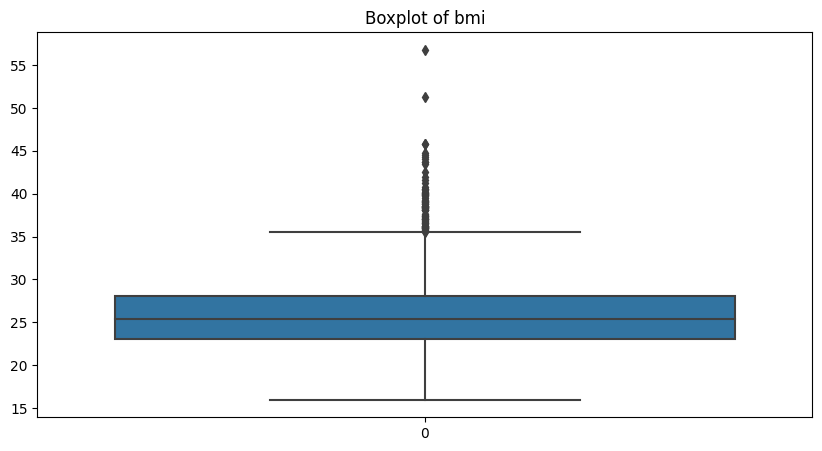

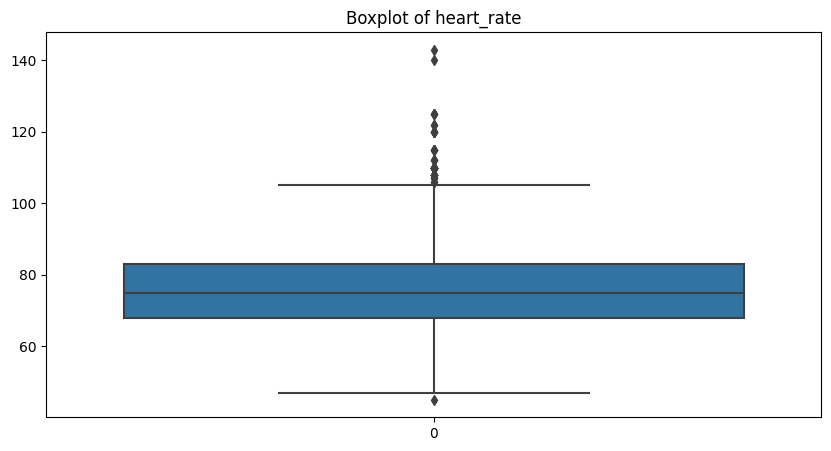

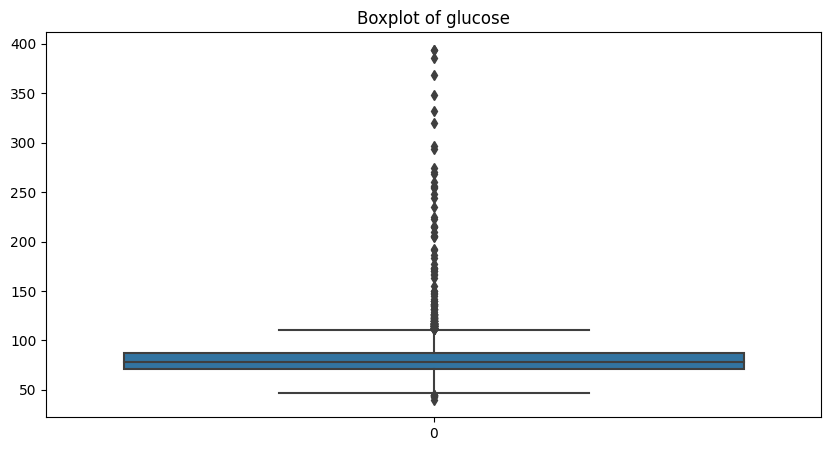

In [390]:
#Checking outliers in total_cholesterol, bmi, heart_rate, and glucose columns
for i in ['total_cholesterol','bmi','heart_rate', 'glucose']:
  plt.figure(figsize=(10,5))
  sns.boxplot(cv_risk_df[i])
  plt.title('Boxplot of '+i)
  plt.show()

All the 4 columns contains outliers.

Since there are 304(more number) missing values in glucose column, filling the null values with either of mean or mode will return a biased result.

Hence to avoid biased results, KNN imputation can be performed.

In [391]:
print(cv_risk_df['total_cholesterol'].mean(), cv_risk_df['total_cholesterol'].median())
print(cv_risk_df['bmi'].mean(), cv_risk_df['bmi'].median())
print(cv_risk_df['heart_rate'].mean(), cv_risk_df['heart_rate'].median())

237.07428400954655 234.0
25.7949644549763 25.38
75.97727943346119 75.0


In [392]:
#Filling the missing values in the total_cholesterol, bmi, and heart_rate columns with their medain values
cv_risk_df['total_cholesterol'] = cv_risk_df['total_cholesterol'].fillna(cv_risk_df['total_cholesterol'].median())
cv_risk_df['bmi'] = cv_risk_df['bmi'].fillna(cv_risk_df['bmi'].median())
cv_risk_df['heart_rate'] = cv_risk_df['heart_rate'].fillna(cv_risk_df['heart_rate'].median())

In [393]:
print(cv_risk_df['total_cholesterol'].mean(), cv_risk_df['total_cholesterol'].median())
print(cv_risk_df['bmi'].mean(), cv_risk_df['bmi'].median())
print(cv_risk_df['heart_rate'].mean(), cv_risk_df['heart_rate'].median())

237.03982300884957 234.0
25.793250737463126 25.38
75.97699115044247 75.0


In [394]:
#handling missing values for glucose column
cv_risk_df['glucose'].mean(), cv_risk_df['glucose'].median(), cv_risk_df['glucose'].mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

In [395]:
#Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=20)
imputed= imputer.fit_transform(cv_risk_df)
cv_risk_df = pd.DataFrame(imputed, columns= cv_risk_df.columns)

In [396]:
#mean, median, and mode for glucose after knn imputation
cv_risk_df['glucose'].mean(),cv_risk_df['glucose'].median(),cv_risk_df['glucose'].mode()

(82.04581120943952,
 78.525,
 0    75.0
 Name: glucose, dtype: float64)

The median and mode after KNN imputation remain the same while the mean did not experience any larger change.

In [397]:
#information of the dataset after handling null values
cv_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

Now, there are no null values in the dataframe. But the Dtype for all the columns have been converted to float64, which has to be converted back to their respective Dtypes.

In [398]:
#Changing Dtypes
cv_risk_df = cv_risk_df.astype({'age': int, 'education':float,'sex':int,'is_smoking':int,'cigs_per_day':float,
               'bp_meds':float,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [399]:
#information of the dataset after changing the datatypes
cv_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   float64
 2   sex                3390 non-null   int64  
 3   is_smoking         3390 non-null   int64  
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   int64  
dtypes: float64(9), int64(7)


#**Exploratory Data Analysis**

##**Analysing Correlation**

**Correlation Coefficient**

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

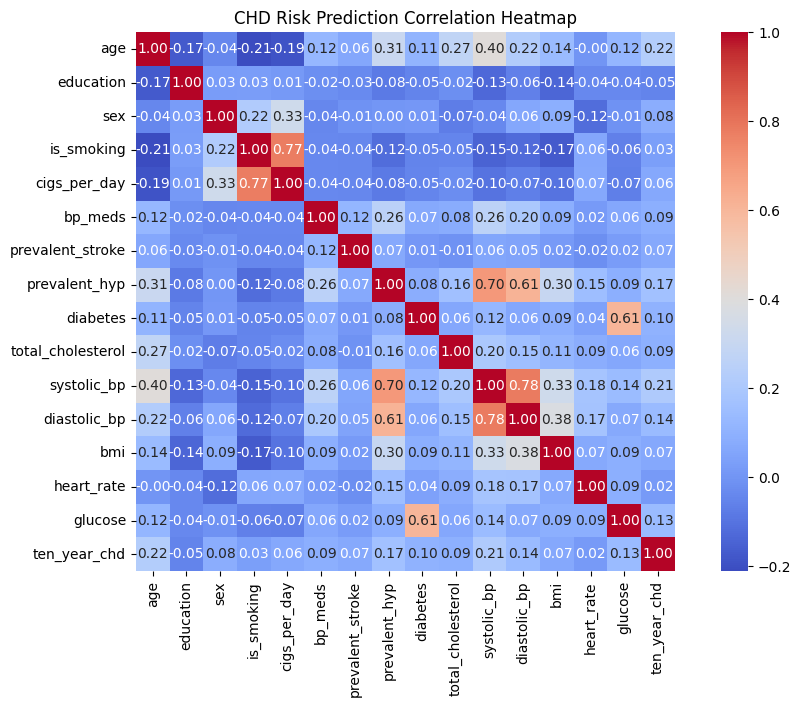

In [400]:
#correlation matrix of CVS Risk Prediction
corrmat = cv_risk_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10}, cmap='coolwarm', vmax=1, square=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('CHD Risk Prediction Correlation Heatmap')
plt.show()

The following columns exhibit high correlation:


1.   is_smoking and cigs_per_day: as the cigarettes per day count depends on the smoking status of the patient.
2.   prevalent hypertension column with both systolic and diastolic BP: since higher the blood pressure values of patients indicates his/her history of Hypertension condition.
3.   systolic BP and diastolic BP
4.   diabetes and glucose: Diagnosis of diabetes primarily depends on the levels of glucose, hence higher the gluose values, higher the chances of incidence of diabetes
5.   A positive correlation between ten_year_chd and age or prevalent_hyp or systolic_bp can be seen.

##**Univariate Analysis**

**For Dependent Variable**

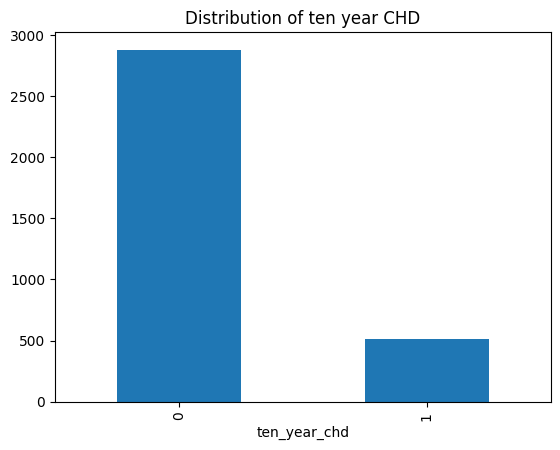

In [401]:
cv_risk_df['ten_year_chd'].value_counts().plot.bar()
plt.xlabel('ten_year_chd')
plt.title('Distribution of ten year CHD')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Only ~15% (around 500 patients) of the patients in the study were eventually exposed to the risk of Cardiac Heart Disease(CHD) and rest of the patients were not exposed to CHD after the end of 10 year study.

**For Continuous Independent variable**

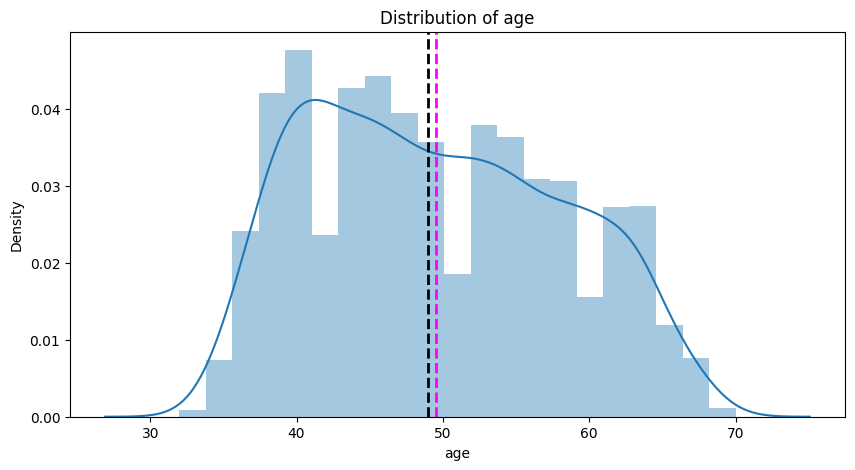

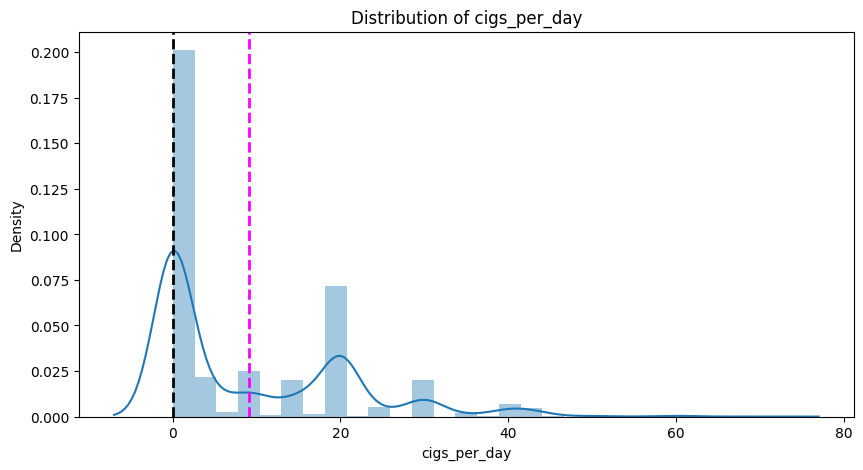

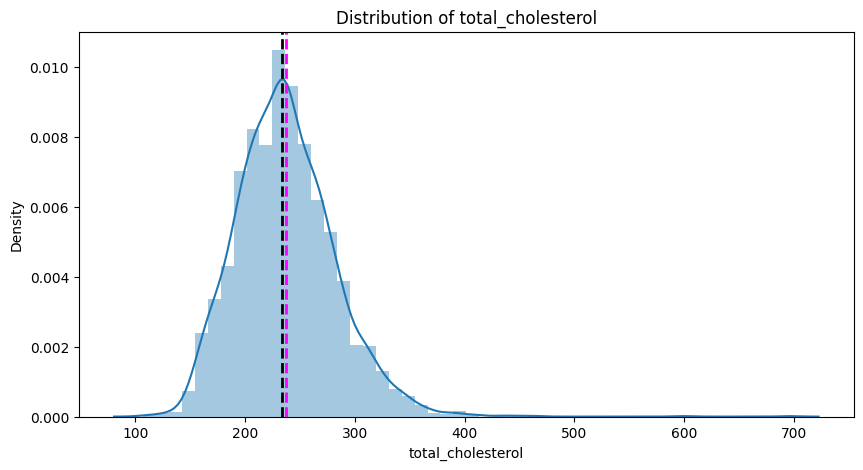

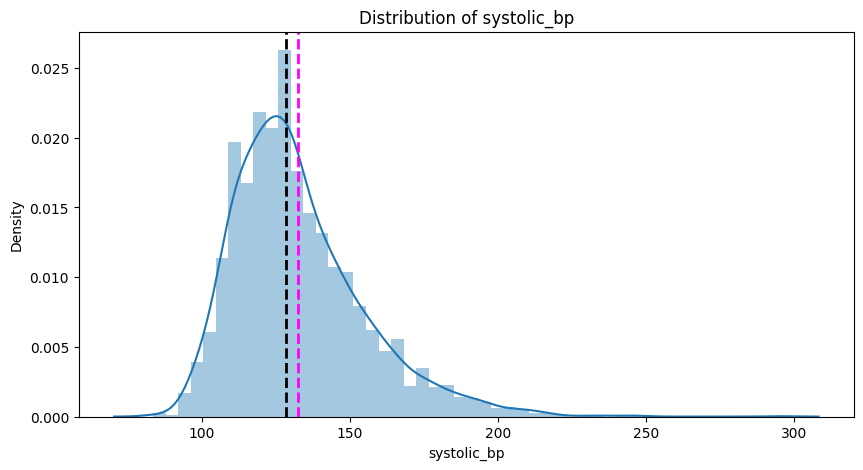

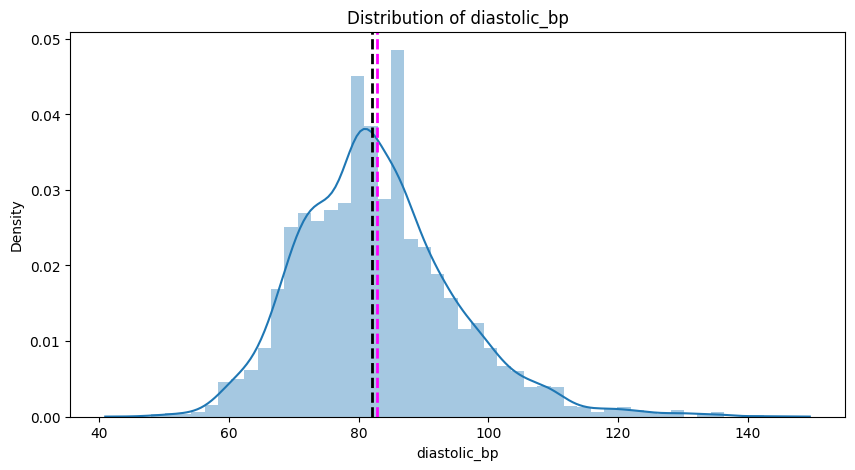

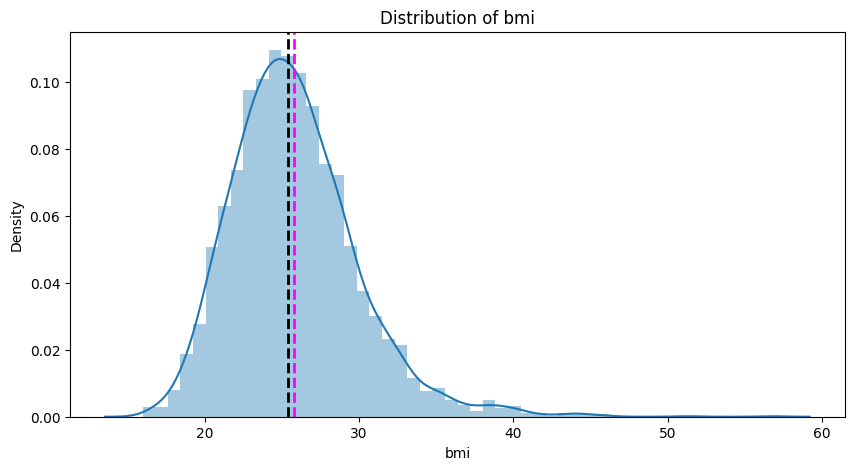

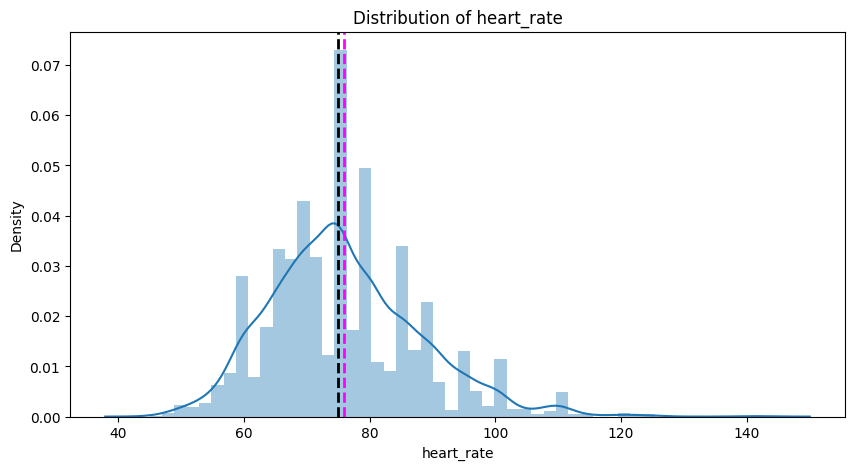

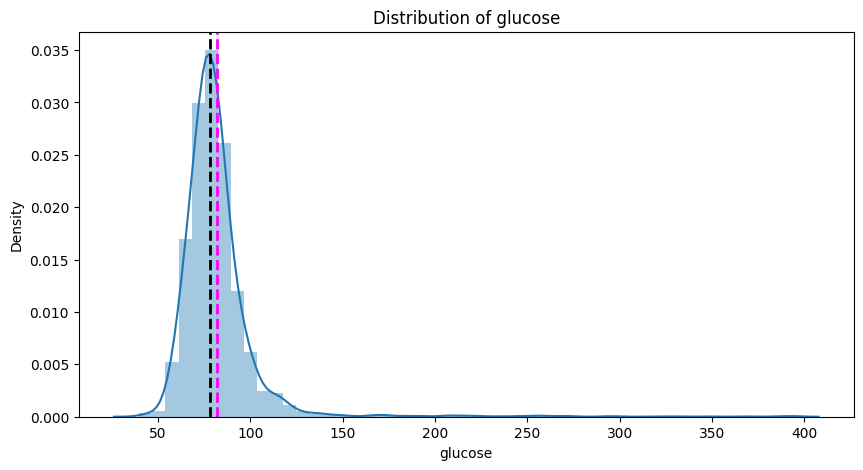

In [402]:
#Analysing the distribution of continuous variables in the dataset
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(cv_risk_df[i])
  plt.axvline(cv_risk_df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(cv_risk_df[i].median(), color='black', linestyle='dashed', linewidth=2)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.title('Distribution of '+i)
  plt.show()

Normal distribution curve can be seen for columns age and diastolic BP. While a positively skewed distribution curve can be seen for cigs_per_day, total_chol systolic_bp, bmi, heart_rate, and glucose columns.

**For Categorical Variable**

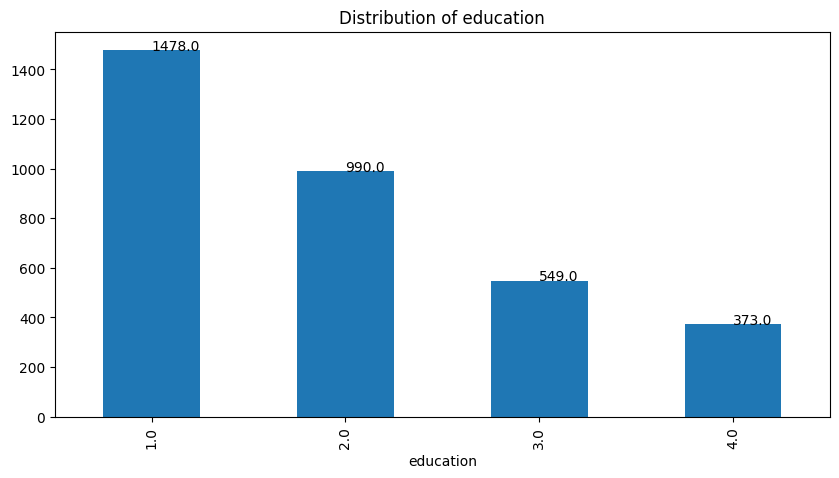

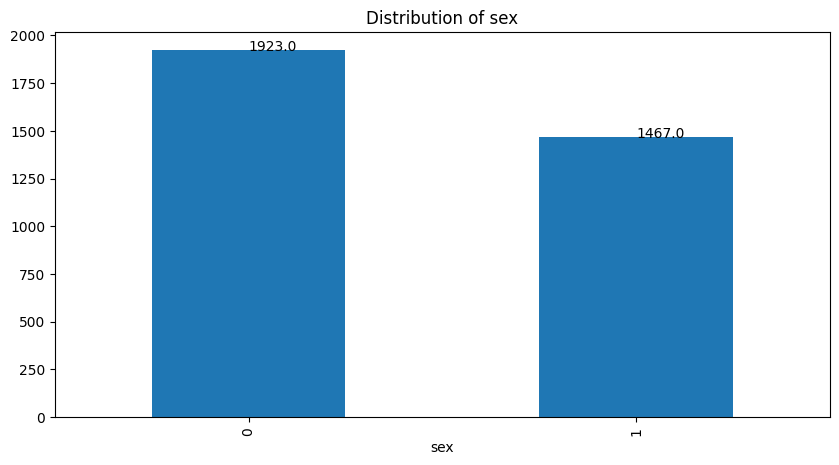

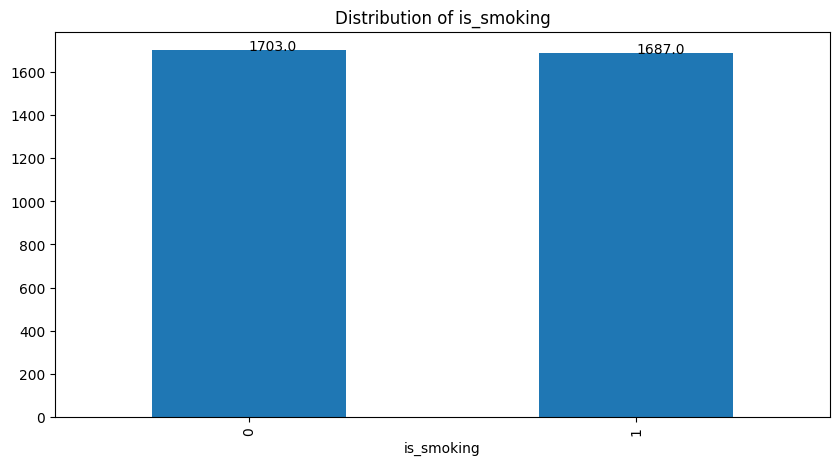

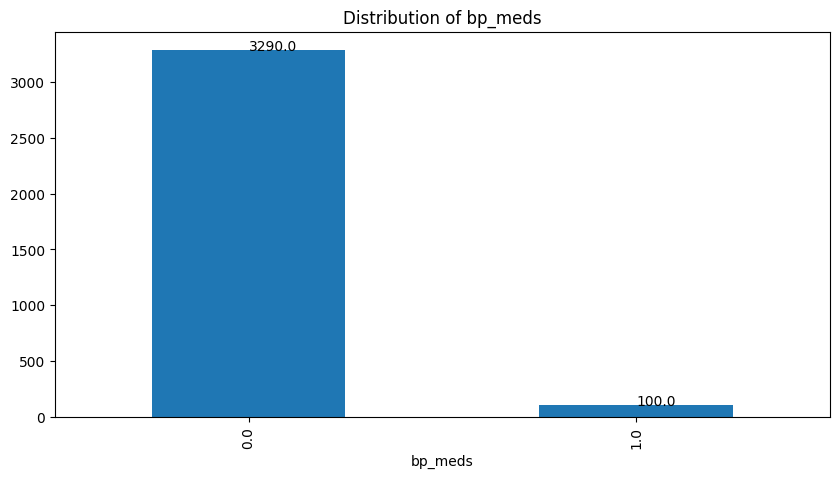

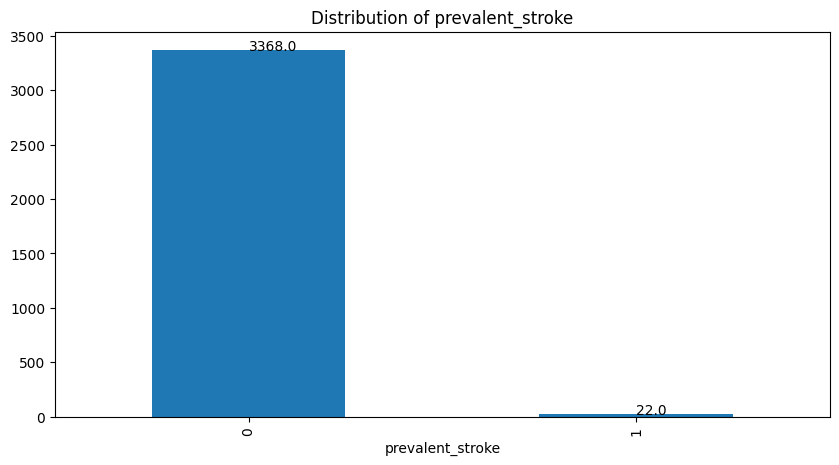

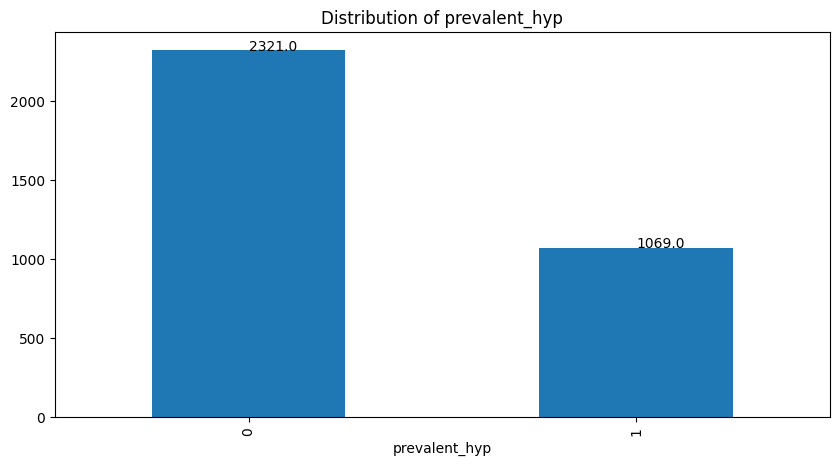

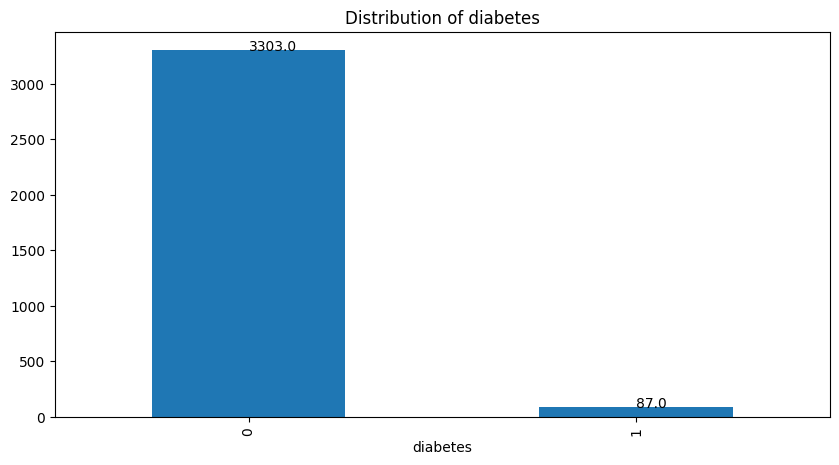

In [403]:
#Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize=(10,5))
  ax=cv_risk_df[i].value_counts().plot.bar()
  plt.xlabel(i)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.title('Distribution of '+i)
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

1.   **Education:**The bar plot depicts that majority of the patients belong to education level 1 followed 2, 3, and 4, respectively.
2.   **Sex:** The number of female patients (o) is comparatively higher than that of male patients (1) in the study.
3.   **is_smoking:** Among the total numbee of patients in the study there is an almost equal contribution of smokers and non-smokers.
4.   **bp_meds:** There are a minimal number of patients (<100) on BP medication and the large number of participants were not on any BP medication at the time of study.
5.   **prevalent_stroke:** Mjority of the patients, around 3500 study particpants did not had a history of stroke.
6.   **prevalent_hyp:** Around 1000 participants have hypertension while the rest had no history of hypertension at the time of the study.
7.   **diabetes:** >3000 participants were not diabetic patients and comparatively, a minimal number of patients (<100) were diabetic.

##**Bivariate Analysis**

**Analysing dependent variable with categorical and continuous independent variables**

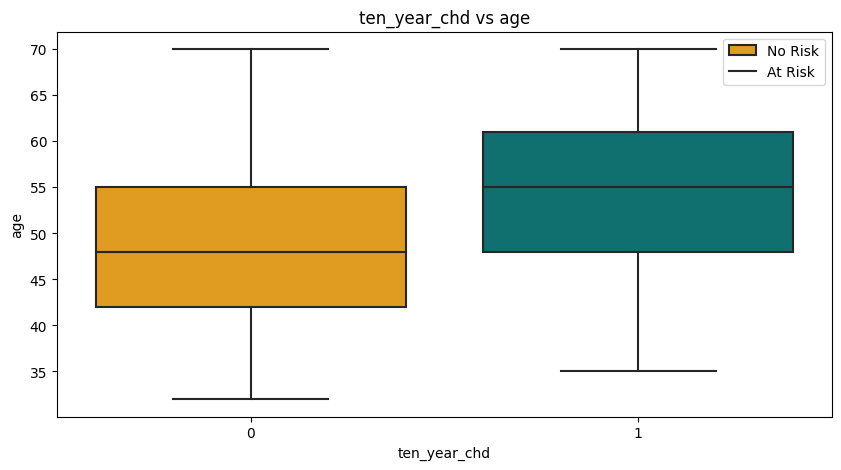

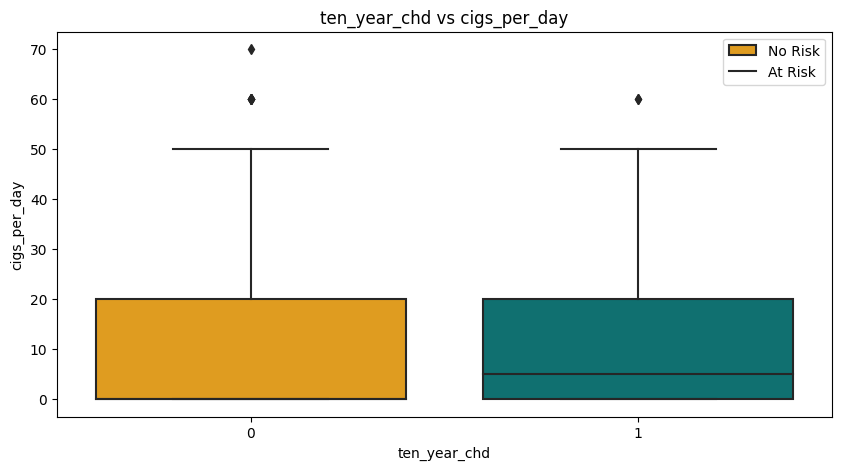

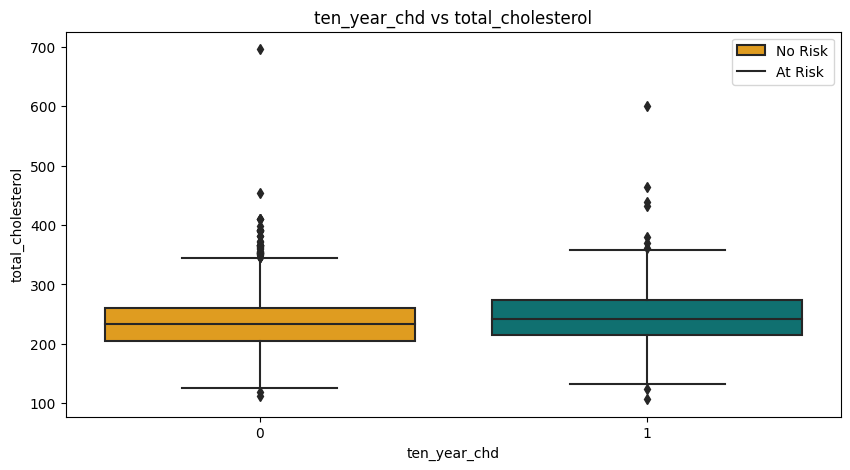

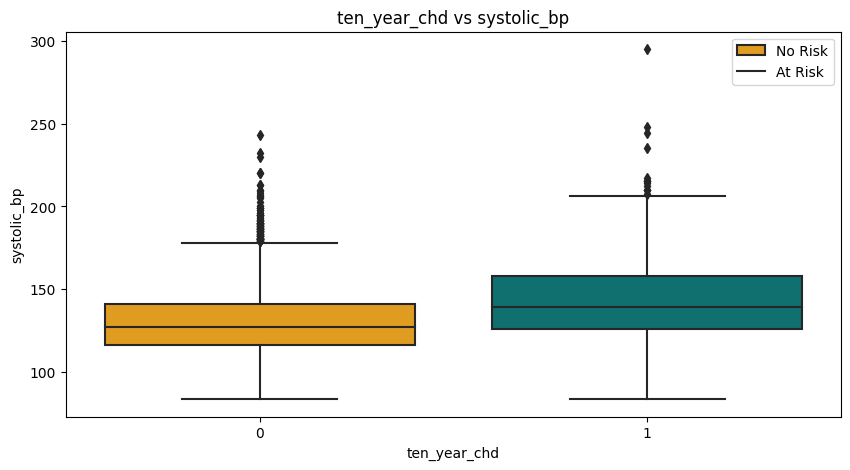

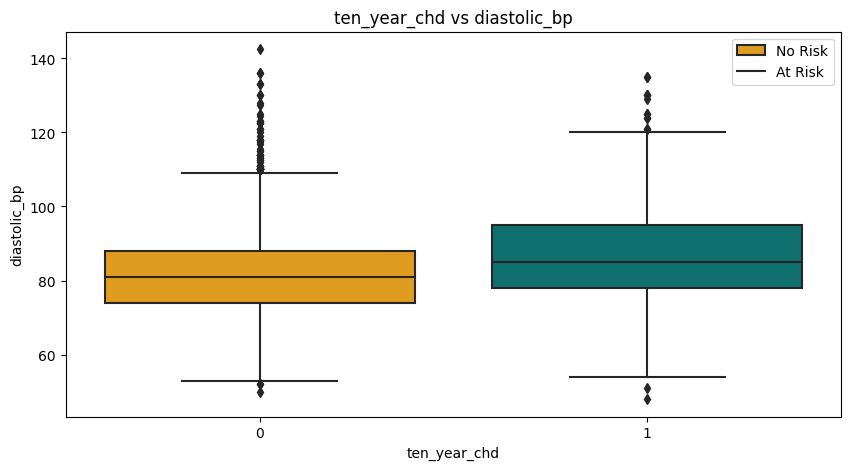

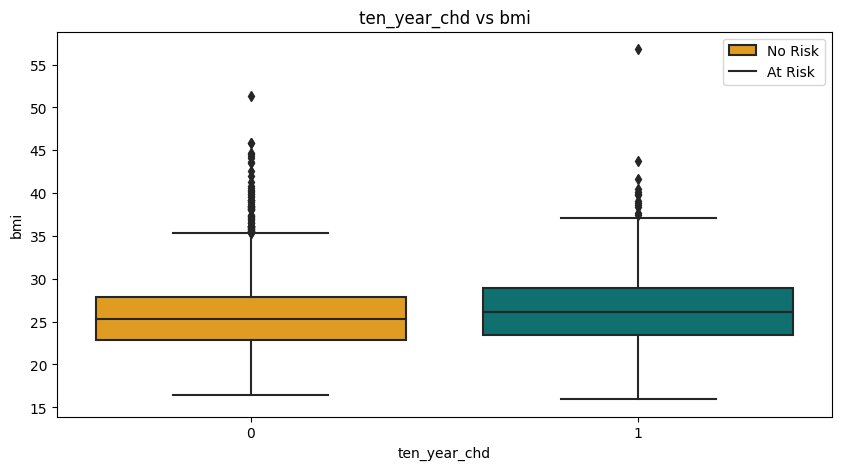

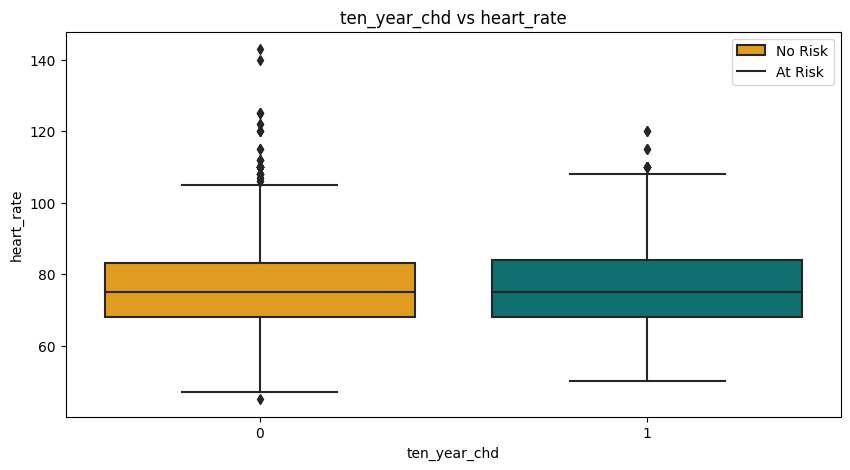

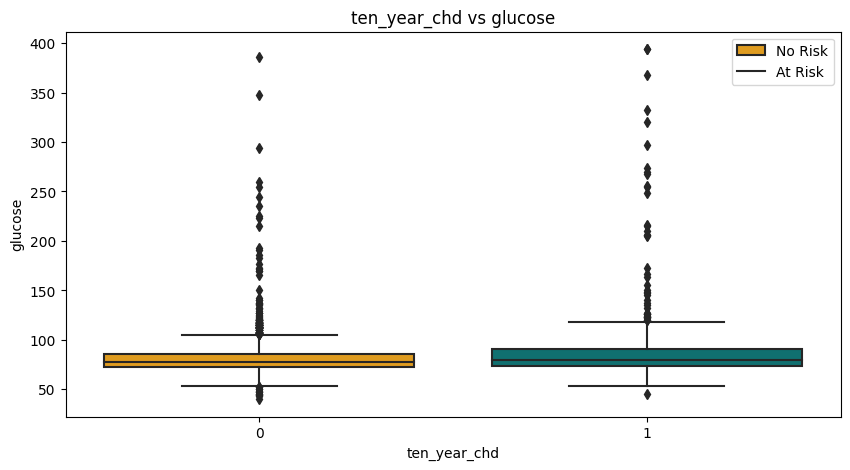

In [404]:
#Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize = (10,5))
  my_palette = {0 : 'orange' , 1 : 'teal'}
  sns.boxplot(x = dependent_var[0], y =i, data= cv_risk_df, palette= my_palette)
  plt.title(dependent_var[0]+' vs '+i)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.legend(['No Risk','At Risk'])
  plt.show()


1.   Individuals **aged** above 45 years pose a comparatively higher risk of CHD.

2.   Higher the **systolic BP** and **diastolic BP**, higher is the risk of incidence of the cardiovascular diseases.

3. Higher **total cholesterol** levels also increases the risk of the cardiac disease slightly.

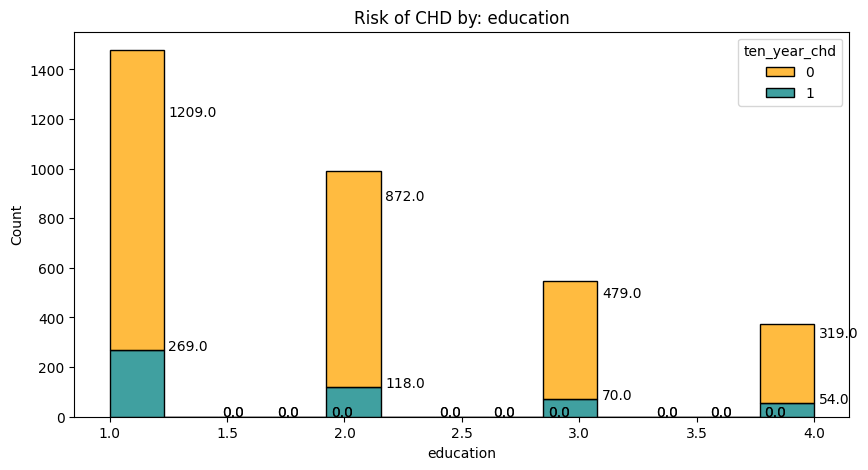

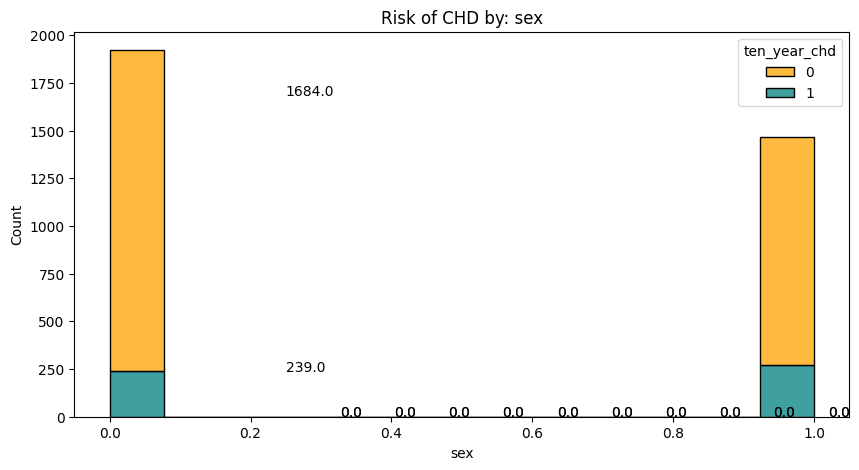

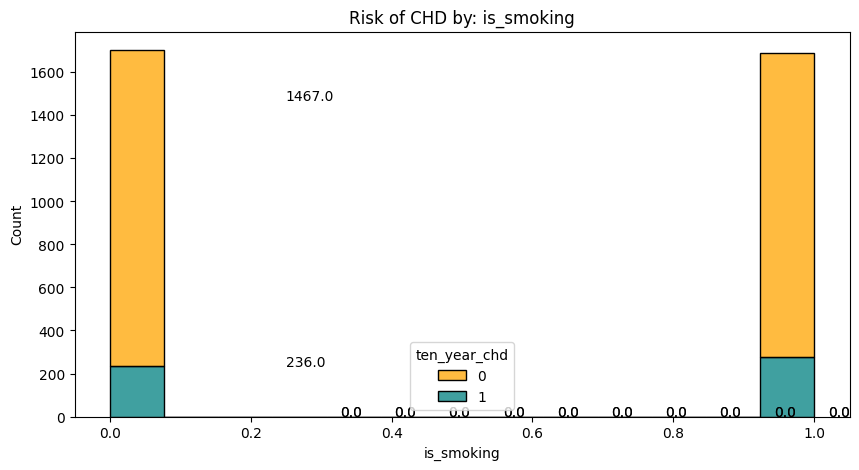

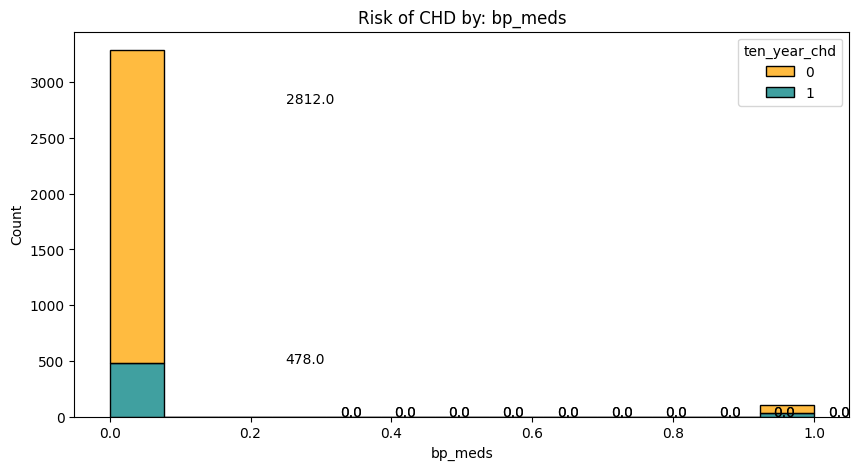

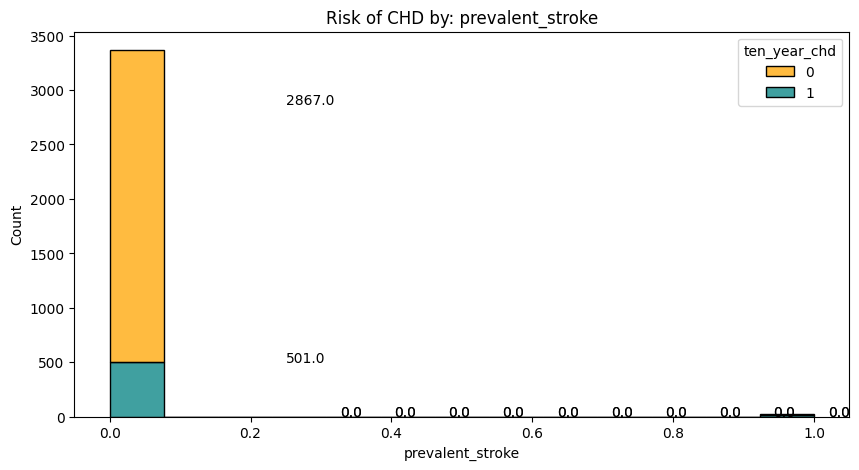

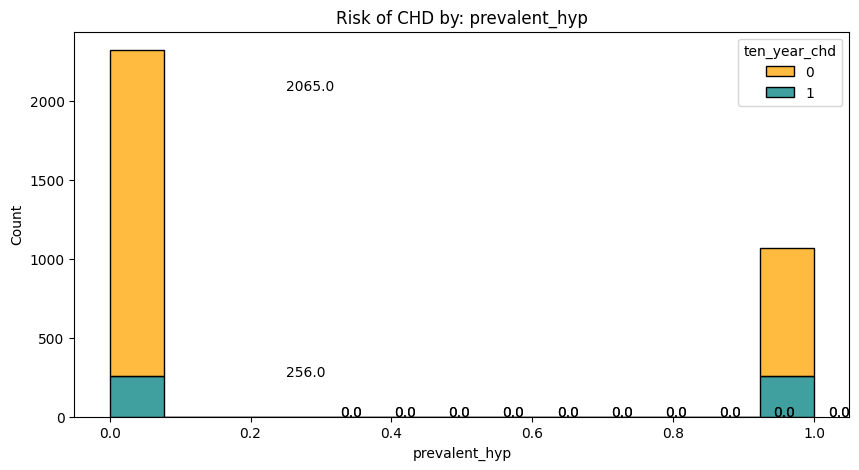

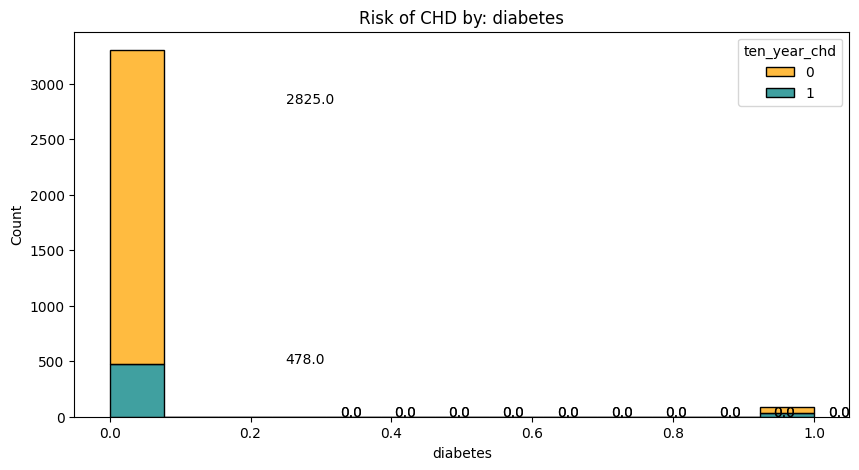

In [405]:
#Relationship between the dependent variable and categorical independent variables
for i in categorical_var:
  plt.figure(figsize=(10,5))
  my_palette = {0 : 'orange' , 1 : 'teal'}
  ax=sns.histplot(x=i, hue=dependent_var[0], data=cv_risk_df, stat="count", multiple="stack", palette= my_palette)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.title('Risk of CHD by: '+i)
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
  plt.show()

1. As the **education** level increases, the incidence of cardiovascular diseases decreases.
2. Almost **males** and **females** have similar risk of future incidence of CHD.
3. **Smokers** pose almost similar risk of developing a cardiac disease such as non-smokers.
4. **Prevalent hypertension** increases the chances of developing CVDs
5. According to the study population, **prevalent stroke** and **diabetes** does not increase the risk of CVDs.

##**Multivariate Analysis**

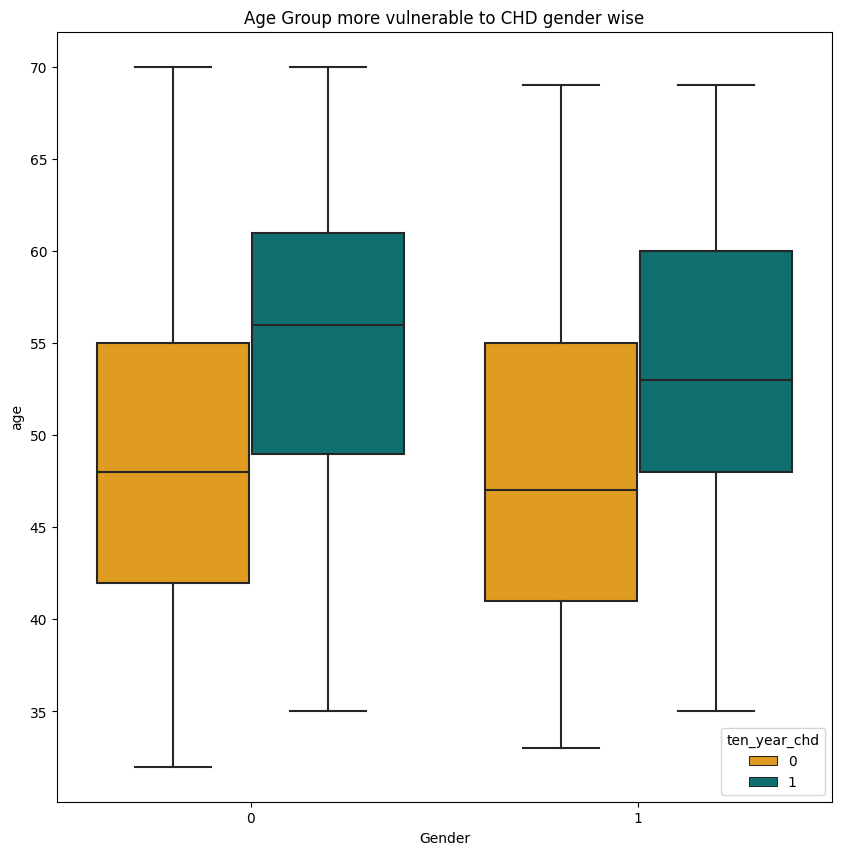

In [406]:
plt.figure(figsize = (10,10))
sns.boxplot(x = cv_risk_df['sex'], y = cv_risk_df['age'], hue = cv_risk_df['ten_year_chd'], palette = my_palette)
plt.xlabel('Gender')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Age Group more vulnerable to CHD gender wise")
plt.show()

Both male and female patients have similar risk for future incidence of cardiovascular diseases according to age.

Mostly both the males and females falling under the category of age nearing 50 years and till 60 years have higher risk of developing future CHD.

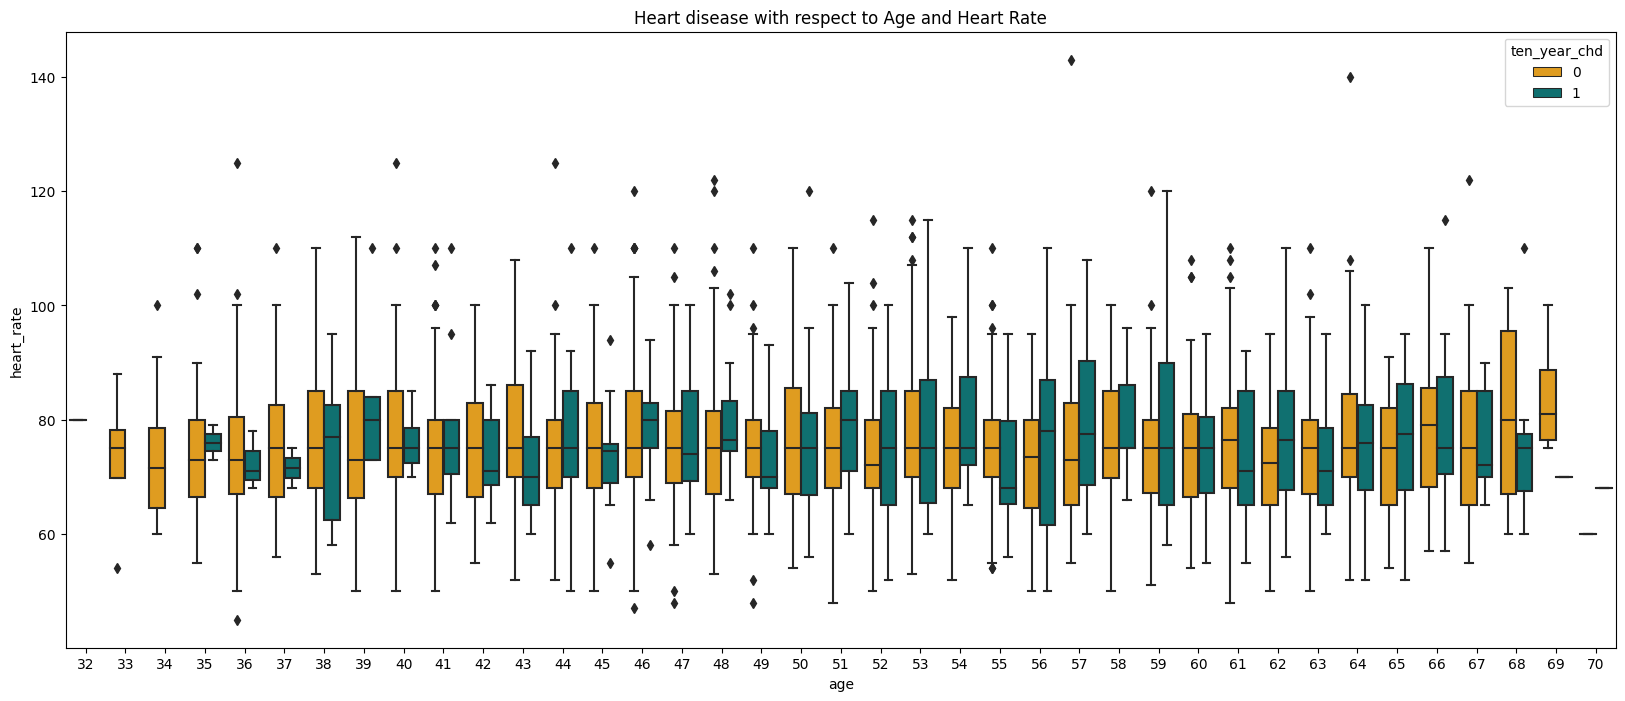

In [407]:
#plotting graph to analyze heart disease incidence with respect to age and heart rate
plt.figure(figsize=(20,8))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.boxplot(x= 'age',y='heart_rate',hue='ten_year_chd',data= cv_risk_df, palette = my_palette)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Heart disease with respect to Age and Heart Rate')
plt.show()

##**Handling Multicollinearity**

The following columns exhibit high degree of correlation:

1.   is_smoking and cigs_per_day: Is smoking column can be removed since for non-smokers the number of cigs_per_day is mentioned as 0 while for smokers the number of cigs_per_day is mentioned >0, which clearly differentiates non-smokers from smokers.
2.   Systolic BP and Diastolic BP: Either one of the columns must be dropped or a feature including both the variables must be added as a column and drop both the variables.
3.   diabetes adn glucose: Either one of the columns must be dropped or a feature including both the variables must be added as a column and drop both the variables.

In [408]:
#dropping is_smoking column from the datset and categorical variables list
cv_risk_df = cv_risk_df.drop('is_smoking',axis=1)
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes']

**Pulse Pressure:**

Pulse pressure (units: mm HG) can be obtained by subtracting the diastolic BP value from the systolic BP value. Generally, pulse pressure value of 40 mm HG is considered as healthy.

It is indicative of cardiac events such as heart attack or stroke and a pulse pressure above 60 mm HG is a risk factor for CVDs especially for geriatrics.

Higher pulse pressure indicates stiffer and more damaged blood vessels (especially largest artery 'aorta') since higher blood pressure causes stiffness of the arteries.

Thus analysing the future risk of CVD using pulse pressure values rather than analysing systolic and diastolic individually is believed to provide more accurate results.

In [409]:
#Creating a new column pulse_pressure (using both diastolic and sytolic bp) and dropping systolic_bp and diastolic_bp
cv_risk_df['pulse_pressure'] = (cv_risk_df['systolic_bp']-cv_risk_df['diastolic_bp'])

**Diabetes Severity:**

The severity of the diabetes can be determined by categorizing the fasting blood glucose levels provided in the main dataframe.

Here, the severity of diabetes id estimated using the blood glucose levels as follows:

- If the glucose levels is less than or equal to 100 then the patient is normal/non-diabetic.
- If the glucose levels are less than or equal to 125 then the patient is prediabetic.
- If the glucose levels are less than or equal to 200 then the patient is suffering from mild diabetes.
- If the glucose levels are less than or equal to 300 then the patient is suffering from moderate diabetes.
- If the glucose levels are greater than 300 then the patient is suffering from severe diabetes.  

In [410]:
#Defining diabetes severity based on glucose levels
def diabetes_grade(glucose):
  if glucose <= 100:
    return 1 # 'Normal'
  if glucose <= 125:
    return 2 # 'Prediabetic'
  if glucose <= 200:
    return 3 # 'Mild Diabetes'
  if glucose <= 300:
    return 4 # 'Moderate Diabetes'
  return 5 # 'Severe Diabetes'

In [411]:
#Applying defined statement to the main dataframe
cv_risk_df['diabetes_severity'] = cv_risk_df['glucose'].apply(lambda x: diabetes_grade(x))
cv_risk_df.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd,pulse_pressure,diabetes_severity
0,64,2.0,0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,63.0,1
1,36,4.0,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,70.0,1
2,46,1.0,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,45.0,1
3,50,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,70.0,1
4,64,1.0,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,51.5,1


In [412]:
#Dropping the systolic and diastolic bp columns
cv_risk_df.drop('systolic_bp',axis=1,inplace=True)
cv_risk_df.drop('diastolic_bp',axis=1,inplace=True)
cv_risk_df.drop('glucose',axis=1,inplace=True)
cv_risk_df.drop('diabetes',axis=1,inplace=True)
cv_risk_df.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,total_cholesterol,bmi,heart_rate,ten_year_chd,pulse_pressure,diabetes_severity
0,64,2.0,0,3.0,0.0,0,0,221.0,25.38,90.0,1,63.0,1
1,36,4.0,1,0.0,0.0,0,1,212.0,29.77,72.0,0,70.0,1
2,46,1.0,0,10.0,0.0,0,0,250.0,20.35,88.0,0,45.0,1
3,50,1.0,1,20.0,0.0,0,1,233.0,28.26,68.0,1,70.0,1
4,64,1.0,0,30.0,0.0,0,0,241.0,26.42,70.0,0,51.5,1


In [413]:
#Updating the continuous_var list
continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.remove('glucose')
continuous_var.append('pulse_pressure')
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'pulse_pressure']

In [414]:
#updating the categorical variables list
categorical_var.remove('diabetes')
categorical_var.append('diabetes_severity')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes_severity']

Text(0.5, 1.0, 'Distribution of Pulse Pressure')

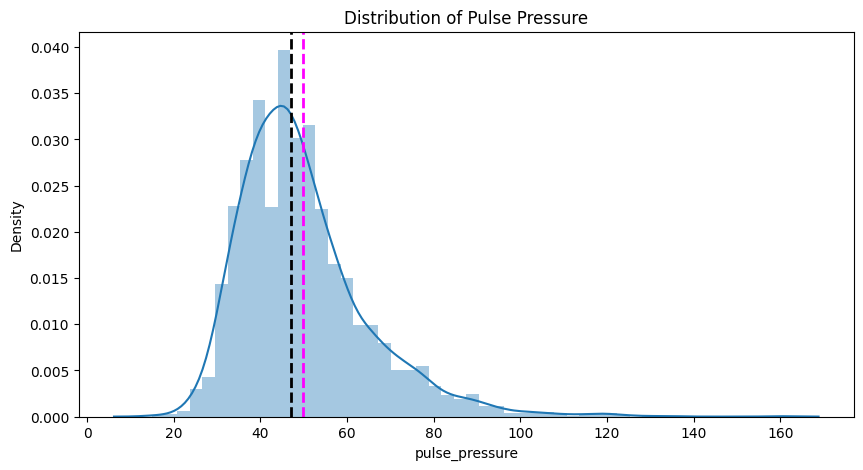

In [415]:
#Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(cv_risk_df['pulse_pressure'])
plt.axvline(cv_risk_df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(cv_risk_df['pulse_pressure'].median(), color='black', linestyle='dashed', linewidth=2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Distribution of Pulse Pressure')

The data distribution of pulse pressure can be seen as a positively skewed curve. Mean and median values of pulse pressure lie around 50 mm HG.

<Figure size 1000x500 with 0 Axes>

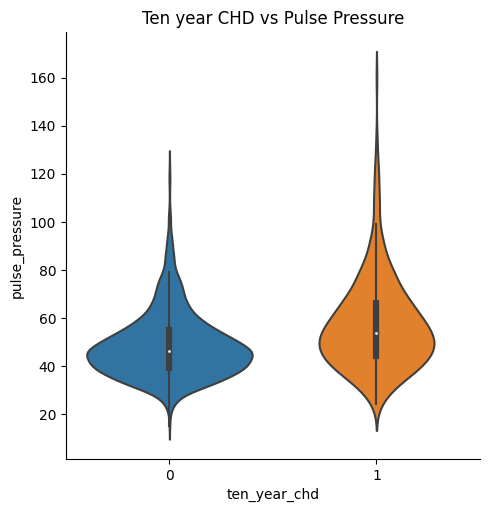

In [416]:
#Relationship between pulse pressure and the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x='ten_year_chd',y='pulse_pressure',data=cv_risk_df,kind='violin')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Ten year CHD vs Pulse Pressure')
plt.show()

A relationship between pulse pressure and 10 year future risk of CHD can be drawn as a risk is seen in patients with higher pulse pressure

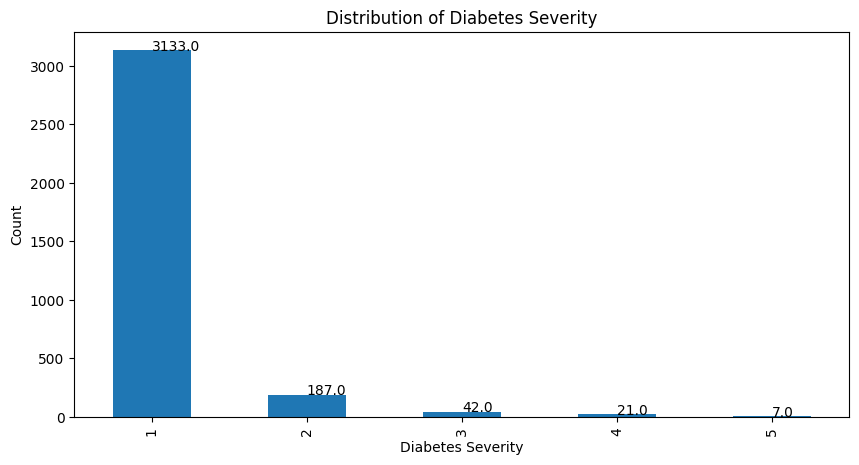

In [421]:
#Plotting distribution figure of the diabetes severity
plt.figure(figsize=(10,5))
ax=cv_risk_df['diabetes_severity'].value_counts().plot.bar()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Diabetes Severity')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Severity')
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

The total number of study participants following under the following diabetes severity are as follows:

- **Non-diabetics (1)**: 3133
- **Prediabetics (2)**: 187
- **Mild Diabetes (3)**: 42
- **Moderate Diabetes (4)**: 21
- **Severe Diabetes (5)**: 7

<Figure size 1000x500 with 0 Axes>

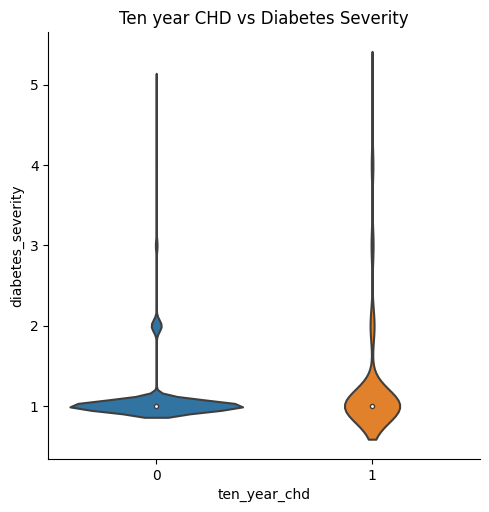

In [418]:
#Relationship between diabetes severity and the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x='ten_year_chd',y='diabetes_severity',data=cv_risk_df,kind='violin')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Ten year CHD vs Diabetes Severity')
plt.show()

Future risk of developing a cardiovascular disease doesn't seem to have much dependency on diabetes severity, since both of the distributions look almost similar.

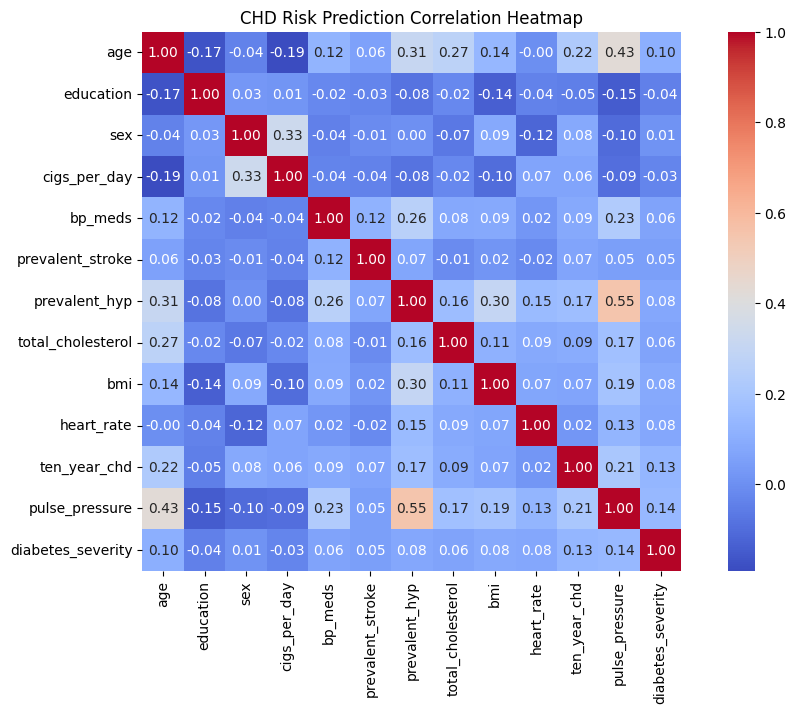

In [419]:
#Correlation matrix after handling the multicollinearity
corrmat = cv_risk_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10}, cmap='coolwarm', vmax=1, square=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('CHD Risk Prediction Correlation Heatmap')
plt.show()

The following variables exhibits a positive correlation after handling multicollinearity
1. Pulse pressure and Age
2. Pulse Pressure and ten_year_chd
3. Pulse pressure and bp_meds

Multicollinearity is handled well since the high degree of correlation between almost all of the independent variables is not seen.

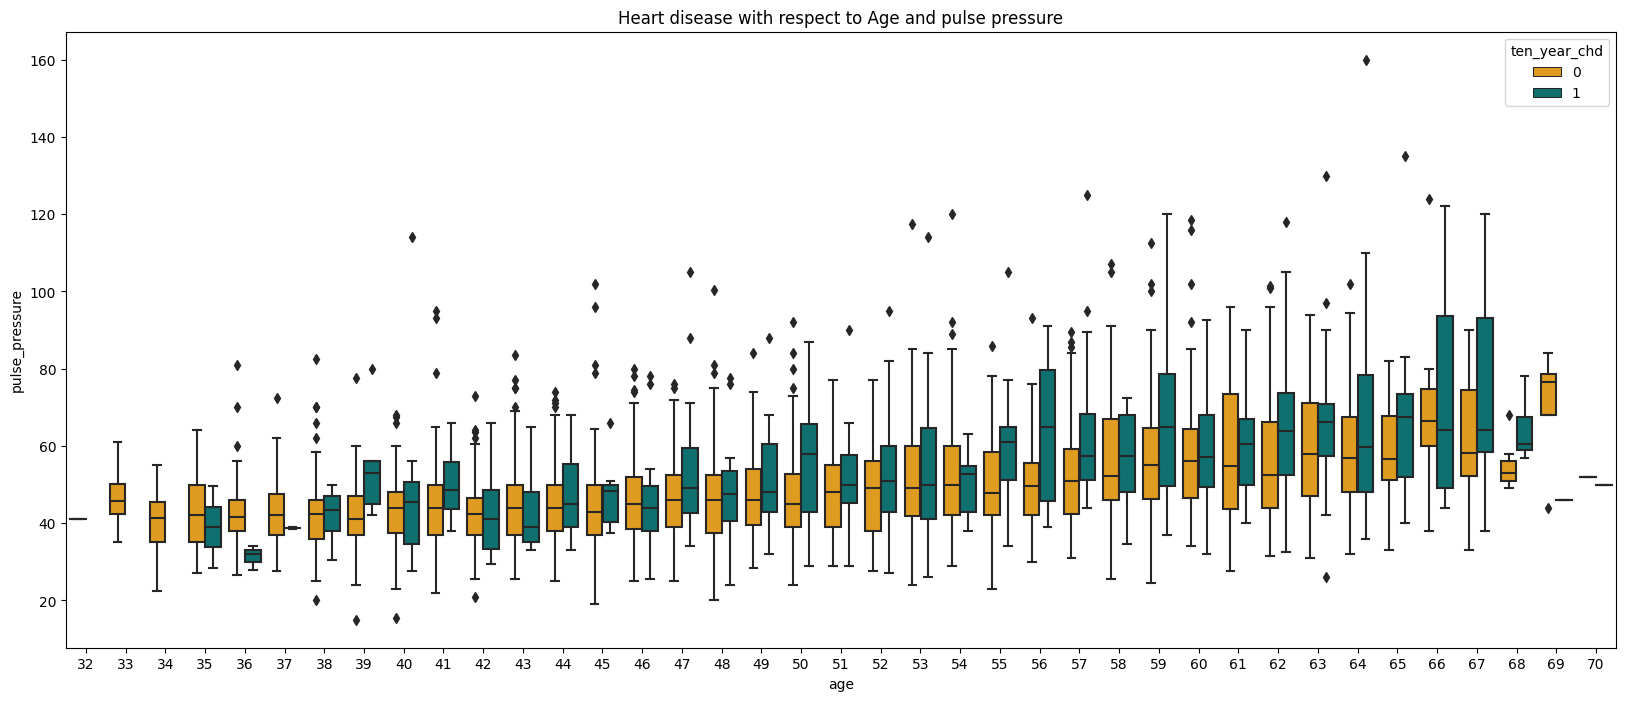

In [420]:
#plotting graph to analyze heart disease incidence with respect to age and pulse pressure
plt.figure(figsize=(20,8))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.boxplot(x= 'age',y='pulse_pressure',hue='ten_year_chd',data= cv_risk_df, palette = my_palette)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Heart disease with respect to Age and pulse pressure')
plt.show()

#**Feature selection**

It's almost rare that all the variables in the dataset are useful to build a predictive model. The generalization capability of the model and the overall accuracy of a classifier maybe reduced with addition of inessential variables. Furthermore adding more variables to a model increases the overall complexity of the model.

##**Discrete feature selection**

### **1. Extra Trees Classifier**

The tree-based strategies used by Extra_Tree_Classifier naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [422]:
#independent col
cols = [col for col in cv_risk_df.columns if col not in {'ten_year_chd'}]
X = cv_risk_df[cols]
y = cv_risk_df['ten_year_chd']

In [423]:
# importing libarary
from sklearn.ensemble import ExtraTreesClassifier

# model fitting
model = ExtraTreesClassifier()
model.fit(X,y)

# ranking feature based on importance
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
print(ranked_features)

age                  0.160755
education            0.057585
sex                  0.019408
cigs_per_day         0.087837
bp_meds              0.009136
prevalent_stroke     0.006401
prevalent_hyp        0.023473
total_cholesterol    0.149147
bmi                  0.151286
heart_rate           0.138378
pulse_pressure       0.160561
diabetes_severity    0.036034
dtype: float64


### **2. Chi Square test**

We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable

Chi square test can be used to check whether discrete variables are related or not. Firstly, defining H0 and H1:
1.   Null Hypothesis (H0): Two variables are independent.
2.   Alternate Hypothesis (H1): Two variables are not independent.

We can use Chi square test to get a p-value and check if a categorical variable is dependent or independent to the dependent variable. If the p value obtained is greater than 0.05 then we reject the null hypothesis, and accept the alternate hypothesis.

In [424]:
#importing libarary
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#model fitting
ordered_rank_features = SelectKBest(score_func=chi2, k='all')
model = ordered_rank_features.fit(X,y)

#ranking feature based on importance
feature_imp = pd.Series(model.scores_,index=X.columns)
print(feature_imp)

age                  255.538687
education              4.761842
sex                   13.778390
cigs_per_day         219.096347
bp_meds               25.102438
prevalent_stroke      15.861998
prevalent_hyp         64.377708
total_cholesterol    253.605200
bmi                    9.693381
heart_rate             2.599388
pulse_pressure       657.863215
diabetes_severity      9.750023
dtype: float64


### **3. Information Gain**

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [425]:
#importing libarary
from sklearn.feature_selection import mutual_info_classif

#model fitting
mutual_info = mutual_info_classif(X,y)

#ranking feature based on importance.
mutual_data = pd.Series(mutual_info, index=X.columns)
print(mutual_data)

age                  0.019357
education            0.002451
sex                  0.000389
cigs_per_day         0.000000
bp_meds              0.000000
prevalent_stroke     0.006848
prevalent_hyp        0.020011
total_cholesterol    0.012226
bmi                  0.009209
heart_rate           0.004898
pulse_pressure       0.025586
diabetes_severity    0.024416
dtype: float64


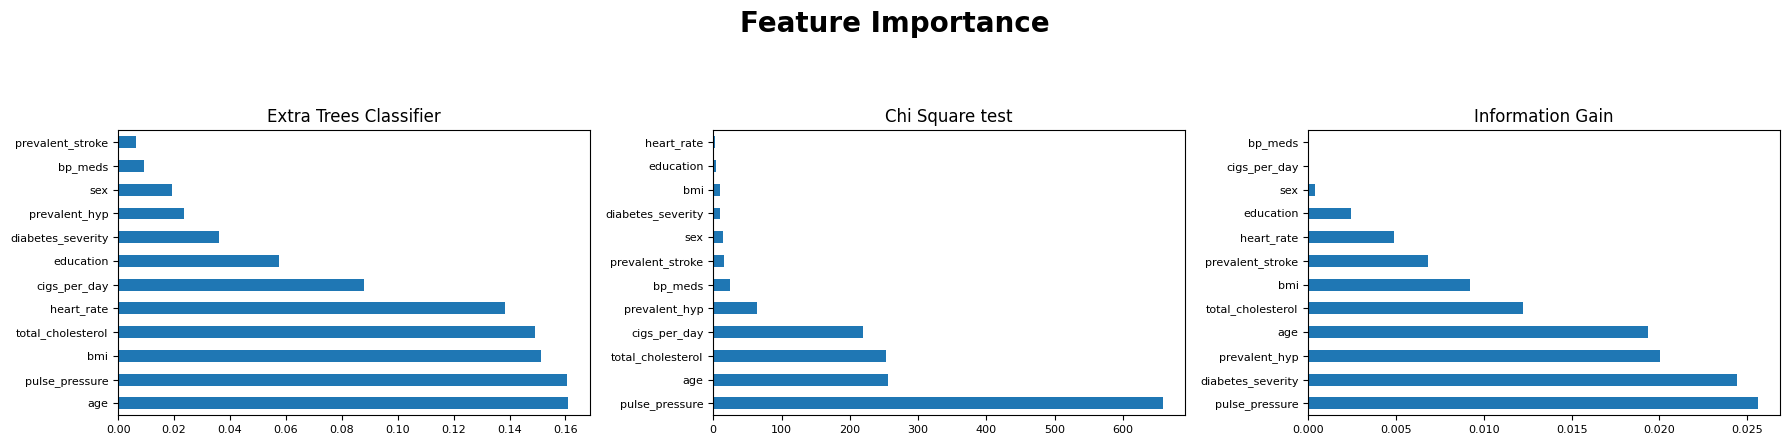

In [426]:
# plotting graph for Feature Importance
fig, axs = plt.subplots(1,3, figsize=(18,4))
ranked_features.sort_values(ascending=False).plot(kind='barh', title='Extra Trees Classifier', fontsize=8, ax=axs[0])
feature_imp.sort_values(ascending=False).plot(kind='barh', title='Chi Square test', fontsize=8, ax=axs[1])
mutual_data.sort_values(ascending=False).plot(kind='barh', title='Information Gain', fontsize=8, ax=axs[2])
plt.suptitle('Feature Importance', fontsize=20, fontweight='bold', y=1.1)
plt.tight_layout()

*   The most important feature in predicting the target variable is **pulse pressure** and **age**.

##**Outliers**

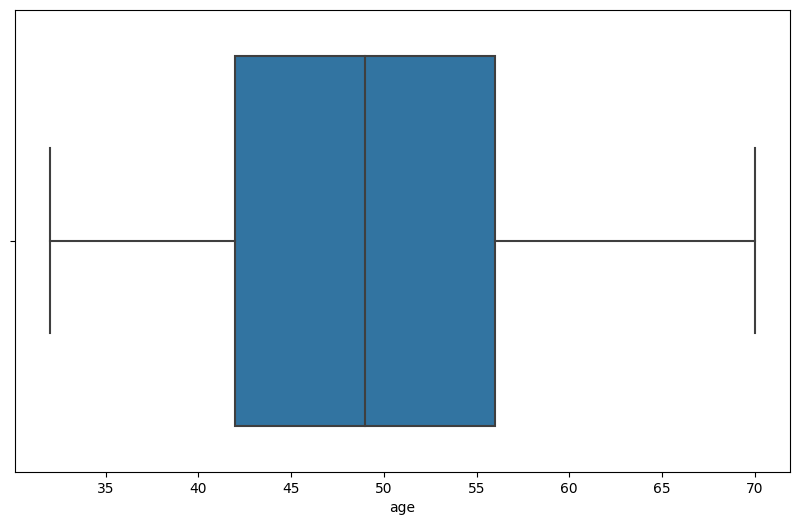

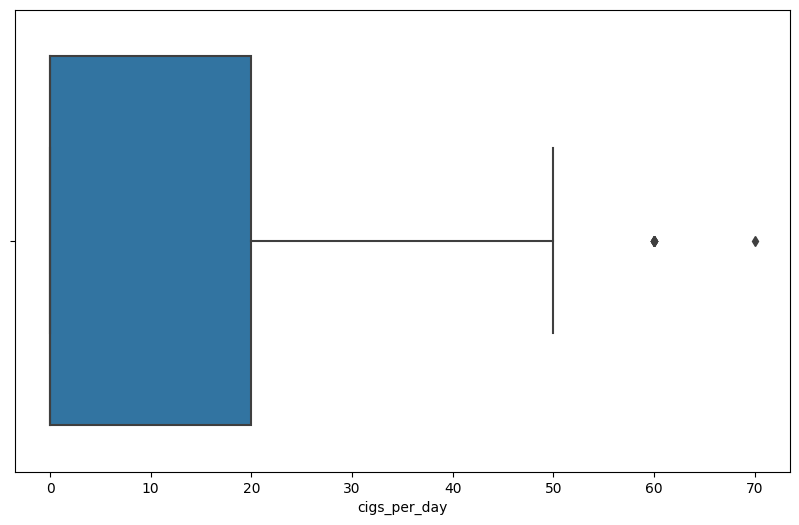

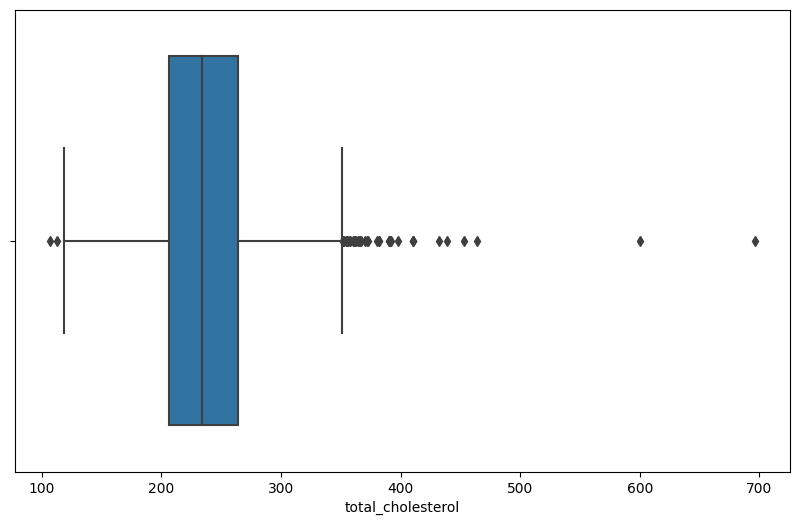

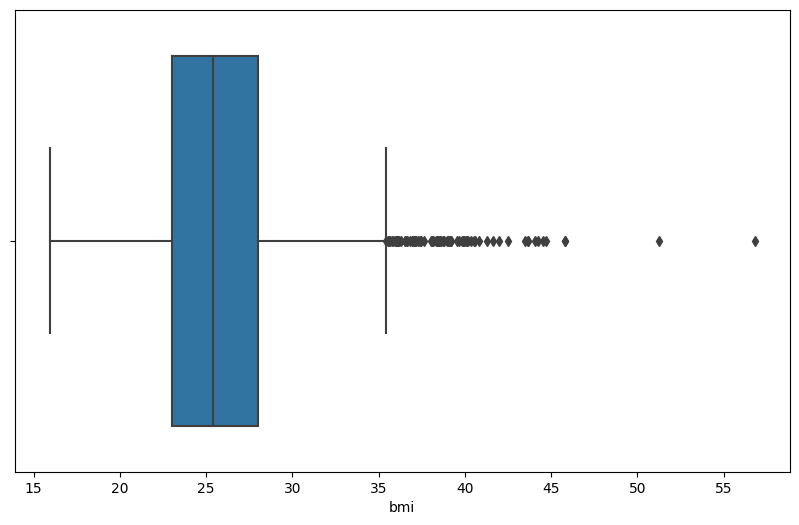

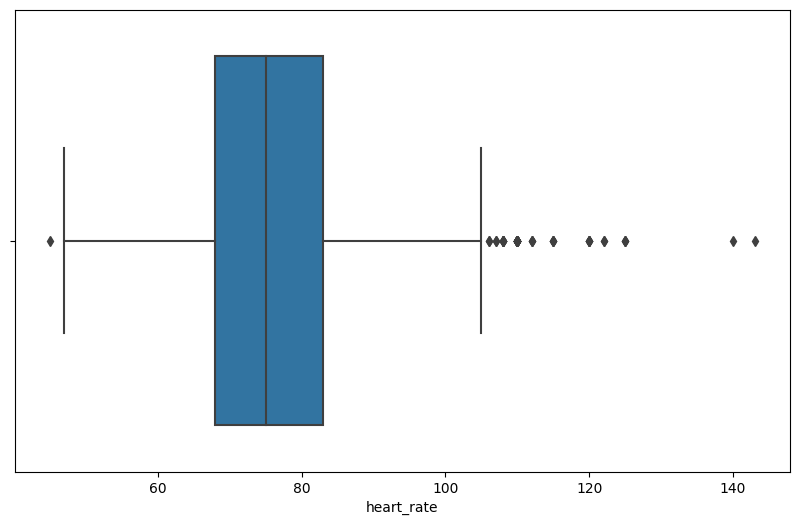

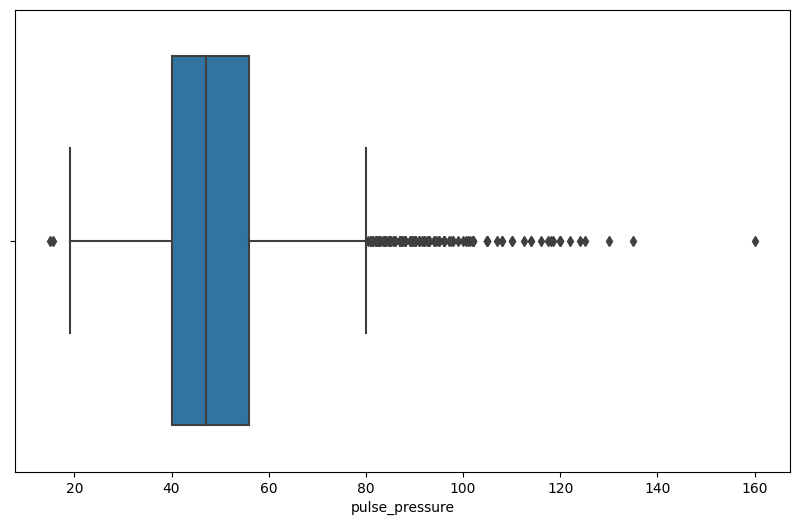

In [427]:
#Checking for outliers for continuous variables
for i in continuous_var:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=i, data = cv_risk_df)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.show()

Exccpt from column age, there are outliers present in all of the other continuous variable columns, namely, cigs_per_day, total_cholesterol, heart_rate, bmi, and pulse_pressure

The effect of the outliers present in the data can be reduced to some extent by transforming it.

If there are outliers beyond 3 standard deviations from the mean, still after the data transformation, then they can be imputed with its respective median value which is done on the train data only to prevent data leakage.

##**Transforming continuous variables to reduce skew**

In [428]:
#skewness along the index axis
(cv_risk_df[continuous_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.204077
total_cholesterol    0.948170
bmi                  1.025551
heart_rate           0.676660
pulse_pressure       1.412382
dtype: float64

Applying log transformation can reduce the magnitude of skew in these variables to a certain extent since almost all of the continuous variables in the dataset are skewed.

In [429]:
#Skew for log10 transformation
np.log10(cv_risk_df[continuous_var]+1).skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
pulse_pressure       0.354174
dtype: float64

The skew in continuous variables is reduced to some extent by applying log transformation.

In [431]:
#Implementing log transformation on continuous variables
cv_risk_df['age']                   = np.log10(cv_risk_df['age']+1)
cv_risk_df['cigs_per_day']          = np.log10(cv_risk_df['cigs_per_day']+1)
cv_risk_df['total_cholesterol']     = np.log10(cv_risk_df['total_cholesterol']+1)
cv_risk_df['bmi']                   = np.log10(cv_risk_df['bmi']+1)
cv_risk_df['heart_rate']            = np.log10(cv_risk_df['heart_rate']+1)
cv_risk_df['pulse_pressure']        = np.log10(cv_risk_df['pulse_pressure']+1)

In [432]:
#Checking skew after log transformation
cv_risk_df[continuous_var].skew(axis = 0)

age                 -0.054403
cigs_per_day         0.179795
total_cholesterol   -0.080262
bmi                  0.270145
heart_rate           0.092858
pulse_pressure       0.354174
dtype: float64

##**Analyzing the distribution of transformed features**

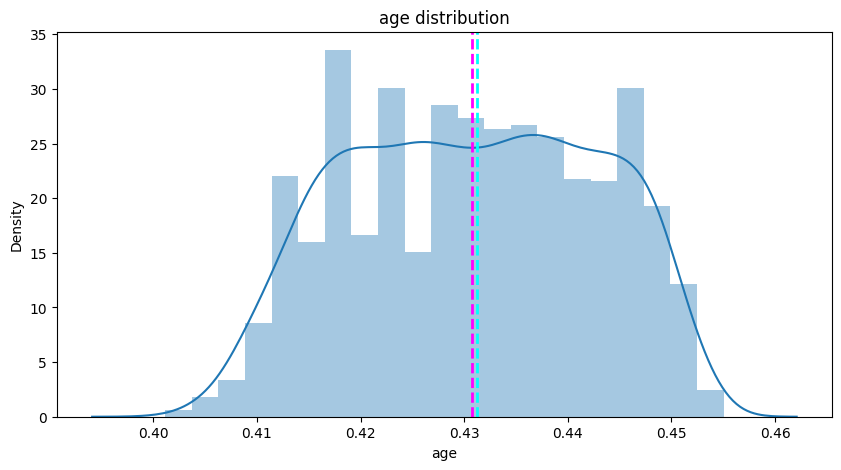

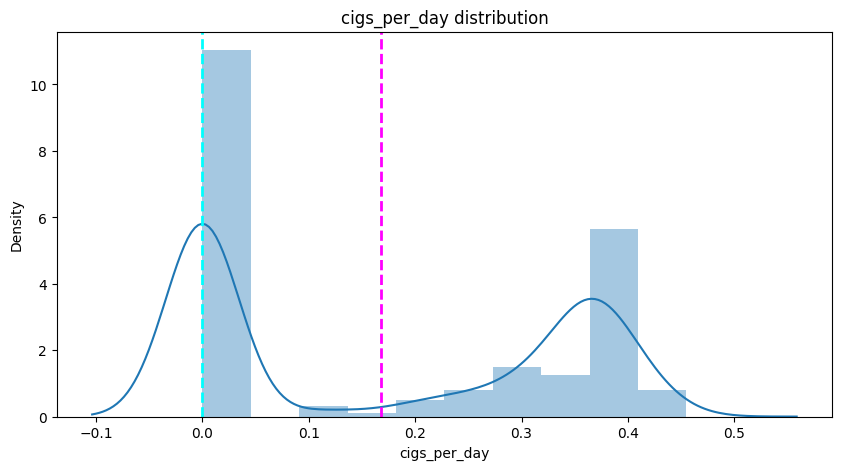

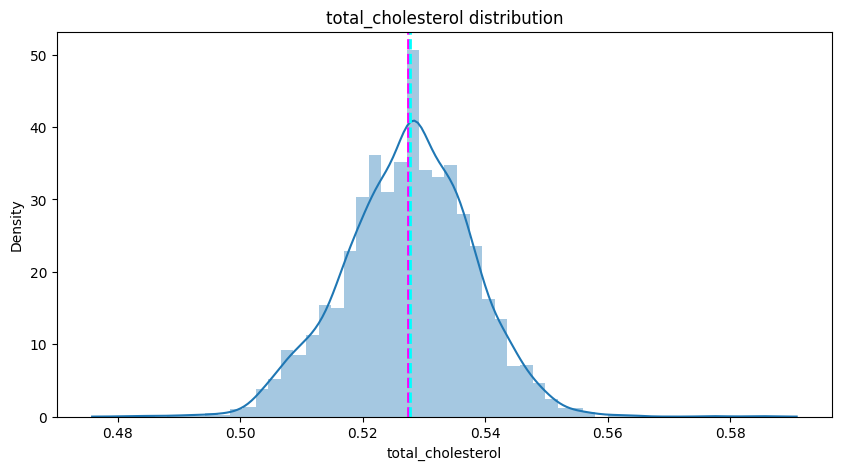

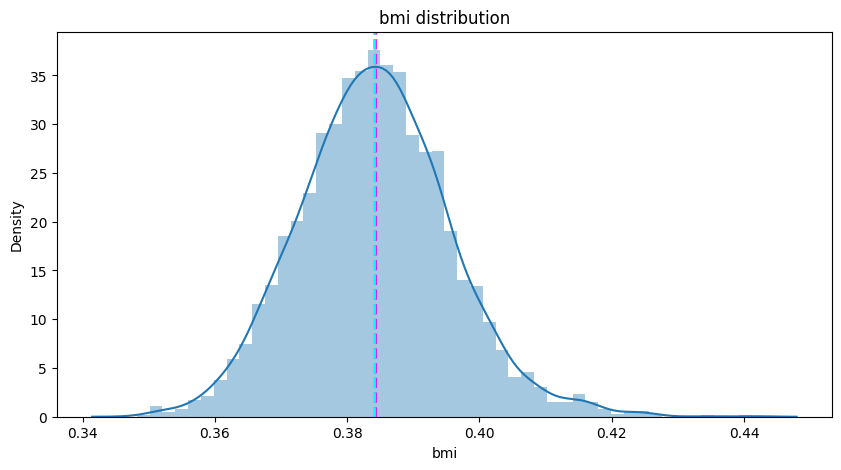

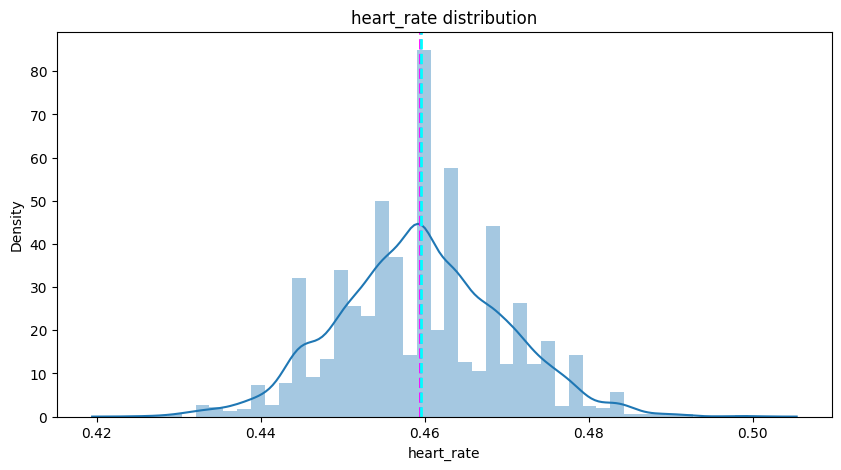

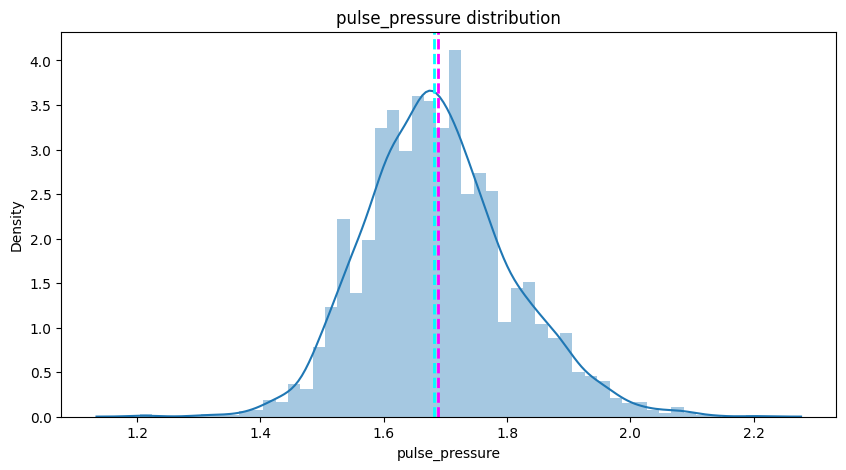

In [433]:
#Analysing the distribution of continuous varaibles after transformation
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(cv_risk_df[col])
  plt.axvline(cv_risk_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(cv_risk_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.title(col+' distribution')
  plt.show()

The skewness is reduced in the continuous variables and these distributions are closer to symmetric or normal distribution except for cigs_per_day.

##**Checking for outliers in transformed features**

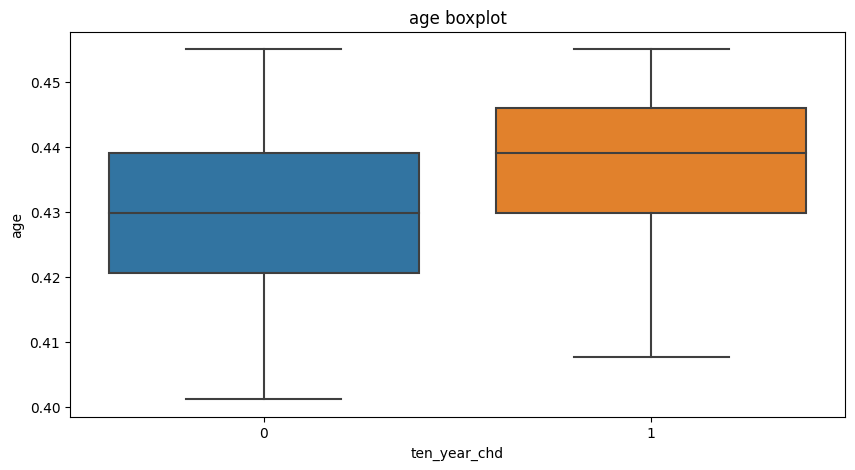

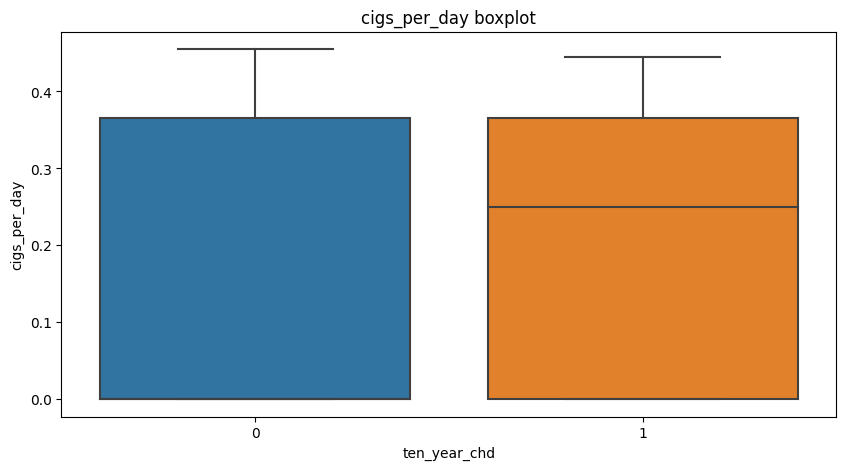

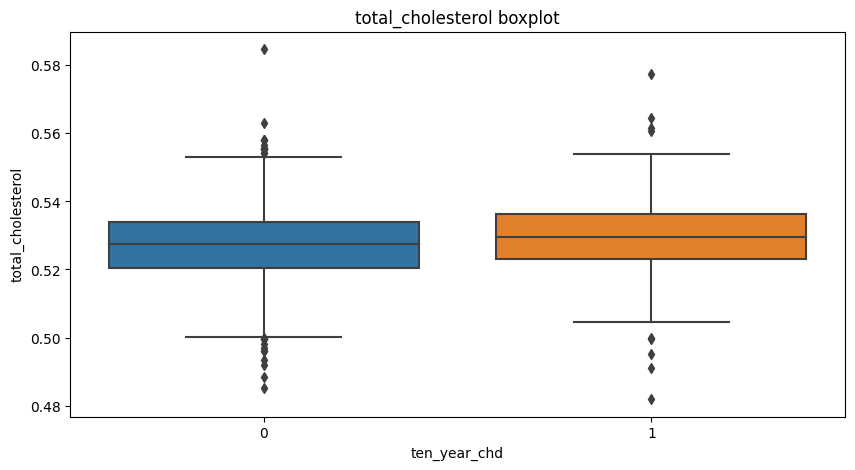

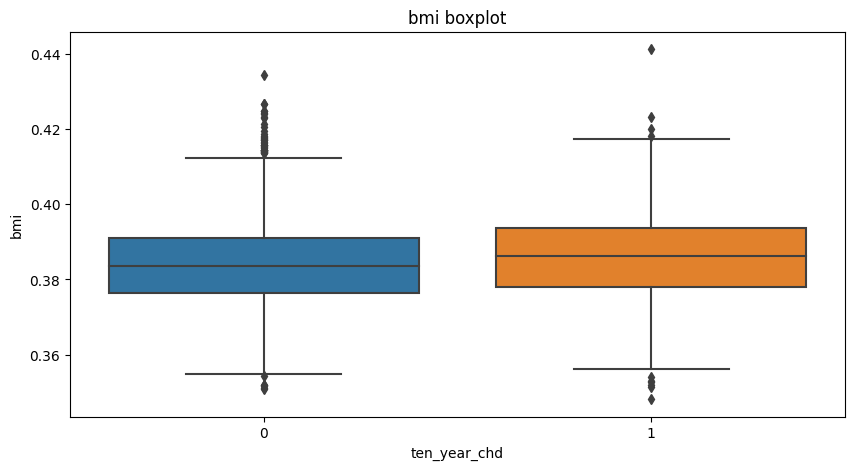

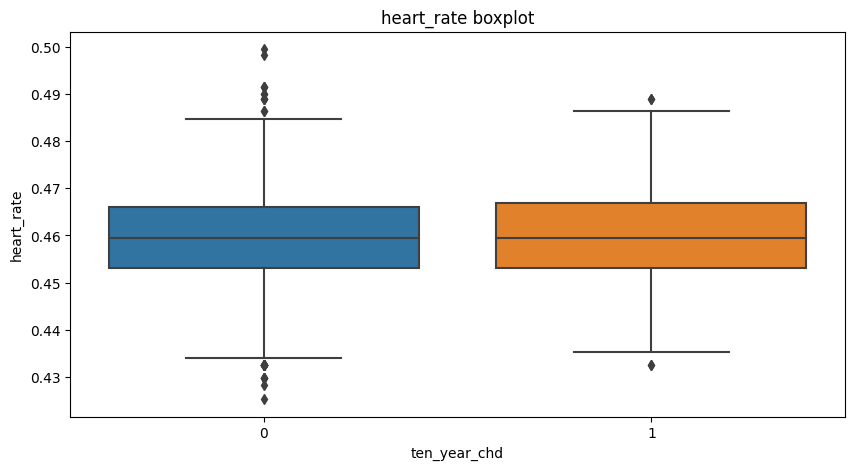

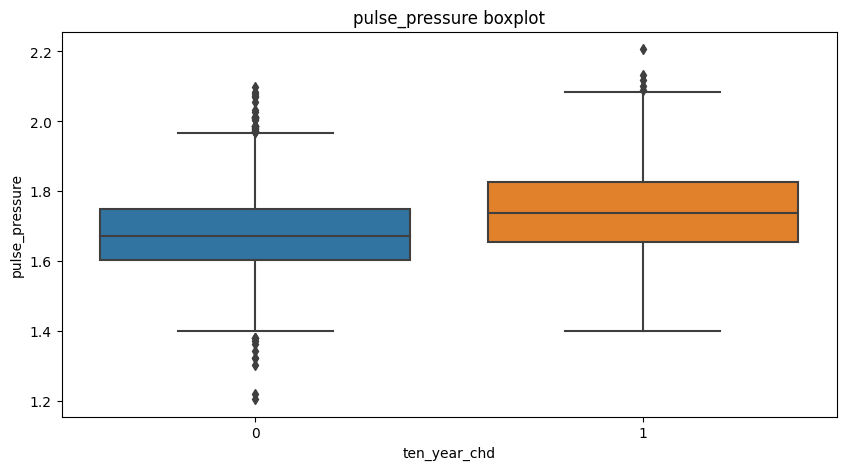

In [434]:
#checking for outliers in log transformed features
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=cv_risk_df)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.title(col+' boxplot')
  plt.show()

*   Almost all of the numerical columns contain outliers even after log transfromation except for age and cigs_per_day columns. But the density of outliers is reduced to some extent.
*   The outliers beyond 3 standard deviations from the mean with its median value can be imputed on the train data to handle this.

#**Data preprocessing**

In [435]:
#Defining dependent and independent variables
X = cv_risk_df.drop('ten_year_chd',axis=1)
y = cv_risk_df[dependent_var]

##**Choice of Prediction Model**

The data is a binary classification problem and the analysiscan  start with a simple model, such as a baseline model which is interpretable, ie, Logistic Regression and try other standard binary classification models like K nearest neighbors, Naive Bayes, decision tree classifier, and support vector machines.

##**Evaluation Metrics**

Since the target variable (ten_year_chd) is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance. As we are dealing with data related to healthcare, false negatives are of higher concern than false positives. It would be a major concern if our model predicts an actual positive as negative and thereby the disease incidence goes undected.

Considering these points in mind, it is decided that we use Recall as the model evaluation metric.

**Recall = True Positive / (True Positive + False Negative)**

In [436]:
#function to get recall score
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

##**Train Test Split**

From the data, ie, around 3390 records, 30% of the records are for testing, and 70% of the records are for training.

Since the target variable is unbalanced, stratified split can be employed to get almost equal proportion of dependent variables in the train and test sets.

In [437]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

In [438]:
#Checking the train distribution of dependent variable
y_train.value_counts()

ten_year_chd
0               2015
1                358
dtype: int64

In [439]:
#Proportion of positive outcomes in train dataset
358/(358+2015)

0.15086388537715972

In [440]:
#Checking the test distribution of dependent variable
y_test.value_counts()

ten_year_chd
0               864
1               153
dtype: int64

In [441]:
#Proportion of positive outcomes in test dataset
153/(153+864)

0.1504424778761062

Both the train and test sets contain almost equal proportion of results.

##**Handling outliers in the train data**

Imputing the outliers in total cholesterol, bmi, heart rate, glucose, and pulse pressure beyond 3 standard deviations from the mean with its median value.

In [444]:
#imputing the outliers beyond 3 standard deviations from the mean with its median value
for i in ['total_cholesterol', 'bmi', 'heart_rate', 'pulse_pressure']:
  upper_lim = X_train[i].mean() + 3 * X_train[i].std()
  lower_lim = X_train[i].mean() - 3 * X_train[i].std()
  X_train.loc[(X_train[i] > upper_lim),i] = X_train[i].median()
  X_train.loc[(X_train[i] < lower_lim),i] = X_train[i].median()

In [445]:
#skewness along the index axis
X_train[continuous_var].skew(axis = 0)

age                 -0.075197
cigs_per_day         0.202452
total_cholesterol   -0.093128
bmi                  0.137258
heart_rate           0.034603
pulse_pressure       0.270388
dtype: float64

In the train data the outliers are handled well and thereby the skew is reduced.

##**Oversampling**

Since we are dealing with uneven data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).

This ensures that the model will be trained equally on all kinds of results, and it is not biased to one particular result.

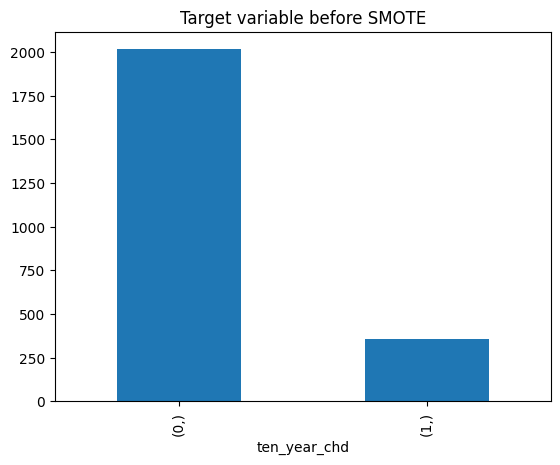

In [446]:
#visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [447]:
#Oversampling using SMOTE
smote = SMOTE()

#fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset are', len(y_train))
print('Samples in the resampled dataset are', len(y_smote))

Samples in the original dataset are 2373
Samples in the resampled dataset are 4030


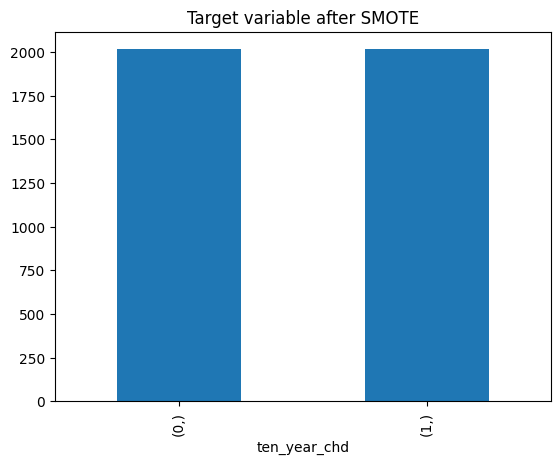

In [448]:
#visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The oversampling of the minority class using SMOTE is done successfully and the number of samples after SMOTE are 4030.. Now the model will be able to learn from both the classes without any bias.

##**Scaling the data**

Since the predictions from the distance based models will get affected if the attributes are in different ranges, we need to scale them.
We can use StandardScaler to scale down the variables.
The results obtained from scaling can be stored and used while building those models.
Tree algorithms do not necessarily require scaling.

In [449]:
#Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

#Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [450]:
#Scaled train values
X_train_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,total_cholesterol,bmi,heart_rate,pulse_pressure,diabetes_severity
0,1.340430,1.042877,1.126340,1.143666,-0.178155,-0.087426,-0.685091,0.288210,-0.538707,-0.262294,0.021221,-0.254928
1,0.251202,-0.929033,1.126340,1.318219,-0.178155,-0.087426,-0.685091,0.174173,0.834071,-0.452839,-0.058061,-0.254928
2,0.875079,-0.929033,1.126340,1.143666,-0.178155,-0.087426,-0.685091,0.719563,0.678729,-0.169263,-0.392623,-0.254928
3,1.428377,-0.929033,-0.887831,-0.948125,-0.178155,-0.087426,1.459660,2.379418,0.470638,0.845754,1.281191,2.002326
4,0.468043,-0.929033,-0.887831,1.143666,-0.178155,-0.087426,-0.685091,0.220105,-1.770858,-0.452839,0.021221,-0.254928


In [451]:
#Scaled SMOTE values
X_smote_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,total_cholesterol,bmi,heart_rate,pulse_pressure,diabetes_severity
0,1.186564,1.129784,1.066739,1.106044,-0.218126,-0.083645,-0.816497,0.235589,-0.643039,-0.288478,-0.172037,-0.273741
1,0.028390,-0.868322,1.066739,1.281079,-0.218126,-0.083645,-0.816497,0.111100,0.809116,-0.492971,-0.251670,-0.273741
2,0.691757,-0.868322,1.066739,1.106044,-0.218126,-0.083645,-0.816497,0.706477,0.644793,-0.188638,-0.587711,-0.273741
3,1.280078,-0.868322,-0.937437,-0.991512,-0.218126,-0.083645,1.224745,2.518462,0.424669,0.900680,1.093504,1.558778
4,0.258956,-0.868322,-0.937437,1.106044,-0.218126,-0.083645,-0.816497,0.161242,-1.946435,-0.492971,-0.172037,-0.273741


In [452]:
#scaled test values
X_test_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,total_cholesterol,bmi,heart_rate,pulse_pressure,diabetes_severity
0,-1.776278,0.130731,1.066739,1.106044,-0.218126,-0.083645,1.224745,0.428950,0.801852,0.469441,-0.767373,-0.273741
1,-0.730344,2.128836,1.066739,0.441444,-0.218126,-0.083645,1.224745,-0.226714,0.921822,-1.878361,0.919247,-0.273741
2,-1.456391,0.130731,-0.937437,-0.991512,-0.218126,-0.083645,-0.816497,-1.488181,-1.414972,-0.492971,-0.374284,-0.273741
3,-0.337481,-0.868322,-0.937437,-0.991512,-0.218126,-0.083645,-0.816497,1.012954,0.470859,-0.288478,0.343666,-0.273741
4,-0.867965,0.130731,-0.937437,1.281079,-0.218126,-0.083645,-0.816497,0.235589,-0.321479,-1.148709,-0.458245,-0.273741


The variables are successfully scaled down using standard scaler method.

#**ML Model Implementation**

##**Logistic Regression**

In [453]:
#Fitting model
lr_model = LogisticRegression()

In [454]:
#Training the model
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

In [455]:
#Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)
#Training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.6818858560794044

In [456]:
#Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)
#Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.6601307189542484

In [457]:
#Classification report
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       864
           1       0.27      0.66      0.38       153

    accuracy                           0.67      1017
   macro avg       0.59      0.67      0.58      1017
weighted avg       0.82      0.67      0.72      1017



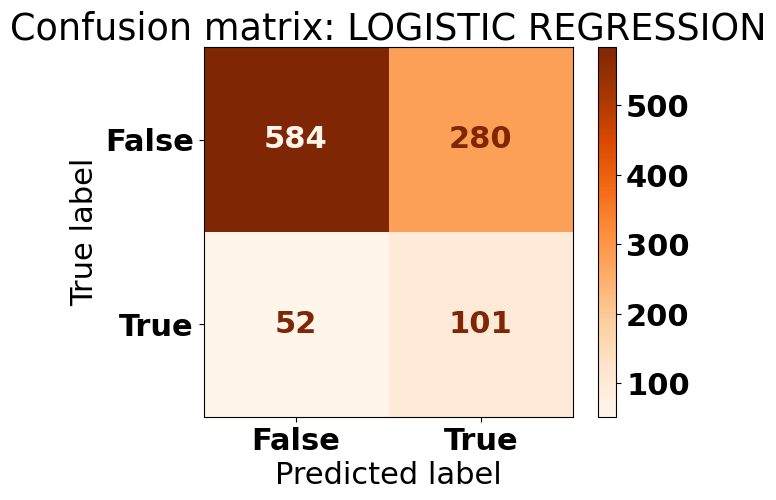

In [458]:
#Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

False negatives obtained after using logistic regression: 52

##**K Nearest Neighbors**

In [523]:
#Value of k taken upto sqrt(n)
#Where n is no of records in the train dataset
#sqrt(4030) = 63.48
knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote_scaled, y_smote)
  knn_train_pred = knn_model.predict(X_smote_scaled)
  knn_train_recall = recall(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)

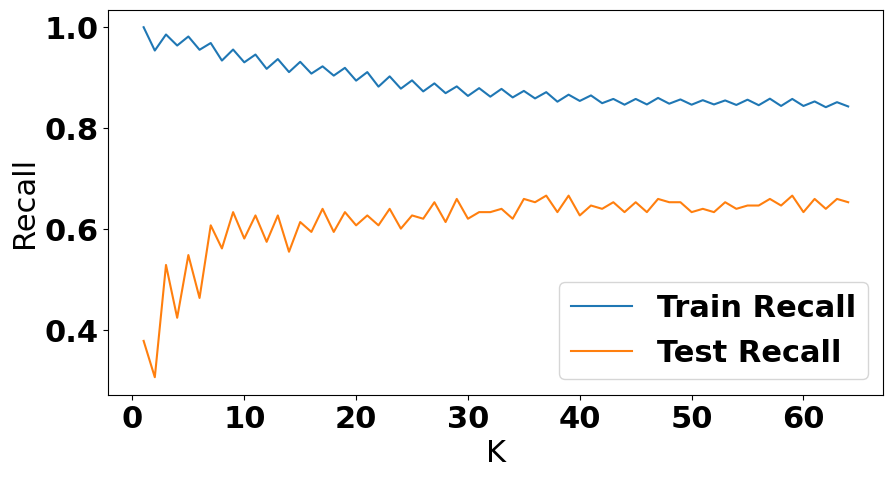

In [524]:
#Plotting the train and test recalls for different values of k
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [525]:
#Best k is where the test recall is the highest
best_k = knn_test_res.index(max(knn_test_res))+1
best_k

37

In [526]:
#building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)

In [527]:
#training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=37)

In [528]:
#Train predictions
knn_train_pred = knn_model.predict(X_smote_scaled)

In [529]:
#training set recall
knn_train_recall = recall(y_smote,knn_train_pred)
knn_train_recall

0.8714640198511167

In [530]:
#Test predictions
knn_test_pred = knn_model.predict(X_test_scaled)

In [531]:
#Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.6666666666666666

In [532]:
#Classification report
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.56      0.69       864
           1       0.21      0.67      0.32       153

    accuracy                           0.58      1017
   macro avg       0.56      0.62      0.51      1017
weighted avg       0.80      0.58      0.64      1017



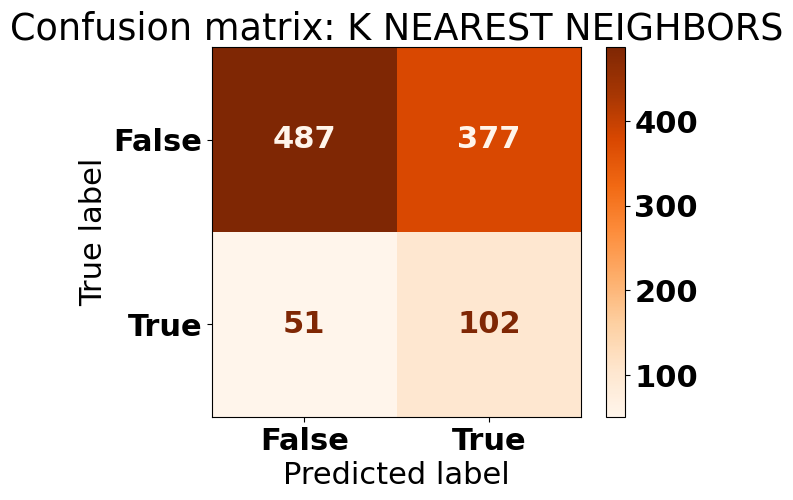

In [533]:
#Confusion matrix
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()

False negatives obtained after using KNN: 51

##**Naive Bayes**

In [470]:
#Using stratified k fold cross validation so that each split has almost equal proportion of classification results
cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3,
                                    random_state=0)

In [471]:
#Fitting model
nb_model = GaussianNB()

In [472]:
#Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }

In [473]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_

In [474]:
#model best parameters
nb_best_params

{'var_smoothing': 1.0}

In [475]:
#building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [476]:
#training the model
nb_model.fit(X_smote_scaled, y_smote)

GaussianNB(var_smoothing=1.0)

In [477]:
#Train predictions
nb_train_pred = nb_model.predict(X_smote_scaled)
#training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.48833746898263025

In [478]:
#Test predictions
nb_test_pred = nb_model.predict(X_test_scaled)
#Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.43790849673202614

In [479]:
#Classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       864
           1       0.30      0.44      0.36       153

    accuracy                           0.76      1017
   macro avg       0.60      0.63      0.60      1017
weighted avg       0.80      0.76      0.78      1017



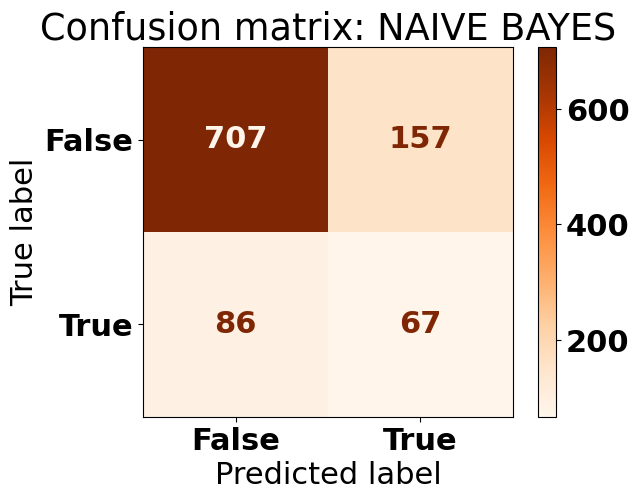

In [480]:
#Confusion matrix
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

False negatives obtained after using Naive Bayes: 86

##**Decision tree**

In [481]:
#Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

In [482]:
#using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=cv_method,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_

In [483]:
#model best parameters
dt_best_params

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [484]:
#building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

In [485]:
#training the model
dt_model.fit(X_smote_scaled, y_smote)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [486]:
#Train predictions
dt_train_pred = dt_model.predict(X_smote_scaled)
#training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall

0.852605459057072

In [487]:
#Test predictions
dt_test_pred = dt_model.predict(X_test_scaled)
#Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.7712418300653595

In [488]:
#Classification report
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62       864
           1       0.21      0.77      0.32       153

    accuracy                           0.52      1017
   macro avg       0.56      0.62      0.47      1017
weighted avg       0.81      0.52      0.58      1017



<Axes: title={'center': 'Feature Importances: DECISION TREE'}>

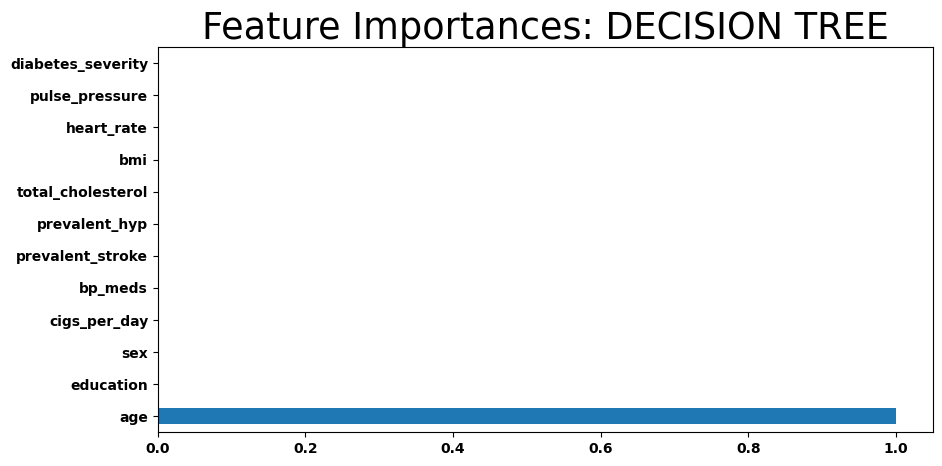

In [489]:
#Feature importances
dt_feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
dt_feat_imp.nlargest(20).plot(kind='barh')

Only one feature 'age' is given imporatance while fitting a decision tree model. This is because of max depth being 1.

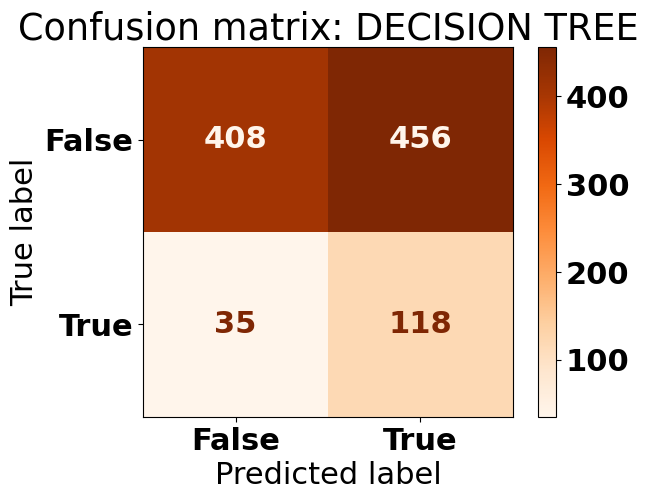

In [490]:
#Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

False negatives obtained after using decision tree: 35

##**Support Vector Machines**

In [491]:
#SVM model parameters
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

In [492]:
#Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=cv_method,
                              scoring= 'recall')
svm_gridsearch.fit(X_smote_scaled,y_smote)
svm_best_params = svm_gridsearch.best_params_

In [493]:
#model best parameters
svm_best_params

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [494]:
#building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

In [495]:
#training the model
svm_model.fit(X_smote_scaled, y_smote)

SVC(C=10, gamma=0.01)

In [496]:
#Train predictions
svm_train_pred = svm_model.predict(X_smote_scaled)
#training set recall
svm_train_recall = recall(y_smote,svm_train_pred)
svm_train_recall

0.7732009925558313

In [497]:
#Test predictions
svm_test_pred = svm_model.predict(X_test_scaled)
#Test recall
svm_test_recall = recall(y_test,svm_test_pred)
svm_test_recall

0.6405228758169934

In [498]:
#Classification report
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       864
           1       0.24      0.64      0.35       153

    accuracy                           0.65      1017
   macro avg       0.58      0.64      0.55      1017
weighted avg       0.81      0.65      0.69      1017



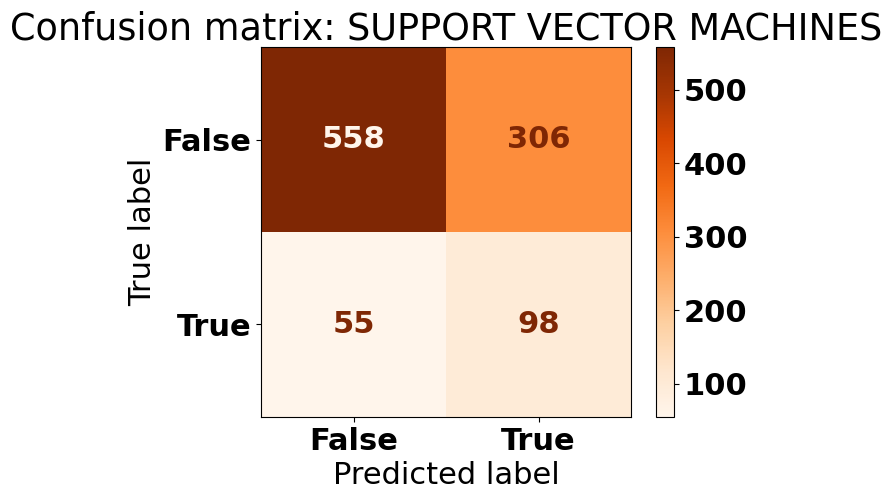

In [499]:
#Confusion matrix
svm_confusion_matrix = cm(y_test, svm_test_pred)
cm_display = cmd(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: SUPPORT VECTOR MACHINES')
plt.show()

False negatives obtained after using Support Vector Machines: 55

## **XG Boost**

In [508]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
# limited due to computational power availability
xgb_params = {'n_estimators':[500],
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [509]:
# using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=cv_method,scoring='recall')
xgb_gridsearch.fit(X_smote_scaled,y_smote)
xgb_best_params = xgb_gridsearch.best_params_

[07:13:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[07:13:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[07:13:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[07:13:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[07:13:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[07:13:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[07:13:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[07:13:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[07:13:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "m

In [510]:
#best parameters for xgboost classifier
xgb_best_params

{'max_depth': 1,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [511]:
#Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                  min_samples_split=xgb_best_params['min_samples_split'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)

In [512]:
#fit the model
xgb_model.fit(X_smote_scaled,y_smote)

[07:20:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, min_samples_leaf=0.1,
              min_samples_split=0.1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None, ...)

In [513]:
#train predictions
xgb_train_pred = xgb_model.predict(X_smote_scaled)
xgb_train_pred = [round(value) for value in xgb_train_pred]

In [514]:
#train recall
xgb_train_recall = recall(y_smote,xgb_train_pred)
xgb_train_recall

0.8143920595533499

In [515]:
#Test predictions
xgb_test_pred = xgb_model.predict(X_test_scaled)
xgb_test_pred = [round(value) for value in xgb_test_pred]

In [516]:
#test recall
xgb_test_recall = recall(y_test,xgb_test_pred)
xgb_test_recall

0.43137254901960786

In [517]:
#Classification report
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       864
           1       0.24      0.43      0.31       153

    accuracy                           0.71      1017
   macro avg       0.56      0.60      0.56      1017
weighted avg       0.79      0.71      0.74      1017



<Axes: title={'center': 'Feature Importances: XG BOOST'}>

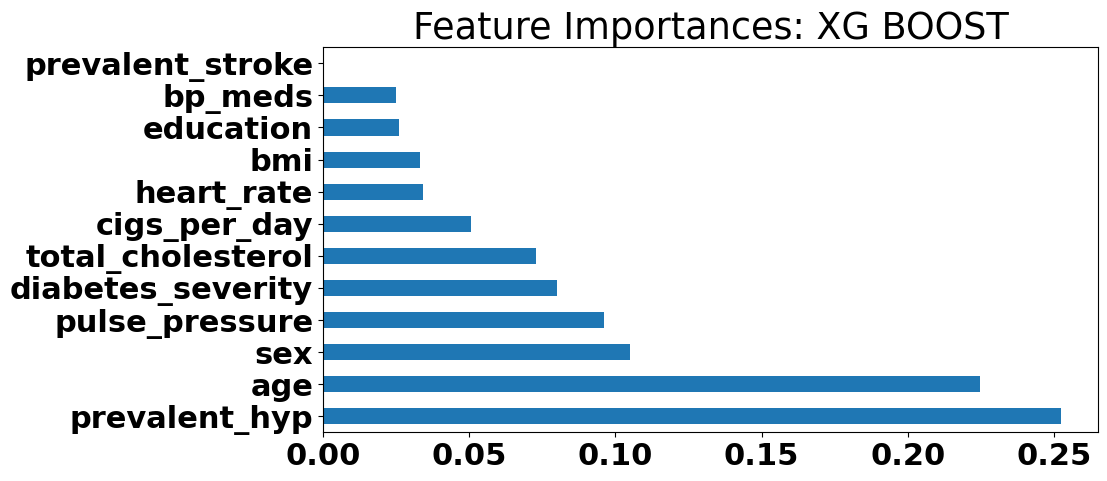

In [518]:
#Feature importances
xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG BOOST')
plt.xlabel('Relative Importance')
xgb_feat_imp.nlargest(20).plot(kind='barh')

- Prevalent hypertension and age the most important feature in deciding the outcome of the variables using XG boost.
- Multiple features are given importance here rather than just one feature as in the case of decision tree.

In [519]:
print(classification_report(y_test,xgb_test_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.88      0.76      0.82       864
    Positive       0.24      0.43      0.31       153

    accuracy                           0.71      1017
   macro avg       0.56      0.60      0.56      1017
weighted avg       0.79      0.71      0.74      1017



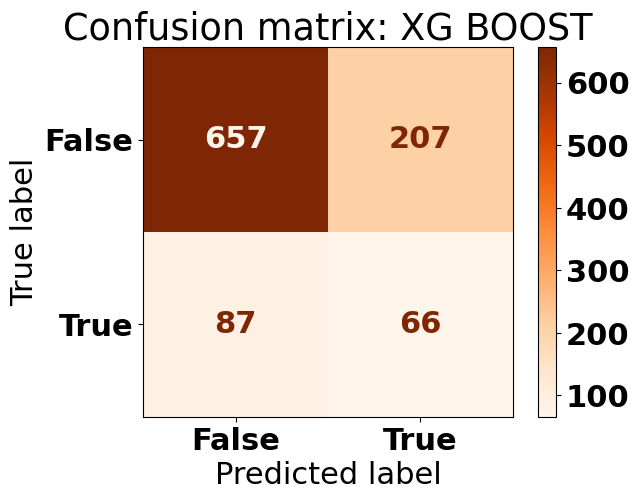

In [520]:
#Confusion matrix
xgb_confusion_matrix = cm(y_test, xgb_test_pred)
cm_display = cmd(confusion_matrix = xgb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: XG BOOST')
plt.show()

False negatives obtained after using XG Boost: 87

#**Results and Conclusion**

The train and test recall scores obtained for different models built are as follows:

In [521]:
#Summarizing the results obtained
test = PrettyTable(['Sl. No.','Classification Model', 'Train Recall (%)','Test Recall (%)'])
test.add_row(['1','Logistic Regression',lr_train_recall*100,lr_test_recall*100])
test.add_row(['2','K Nearest Neighbors',knn_train_recall*100,knn_test_recall*100])
test.add_row(['3','Naive Bayes',nb_train_recall*100,nb_test_recall*100])
test.add_row(['4','Decision Tree',dt_train_recall*100,dt_test_recall*100])
test.add_row(['5','Support Vector Machines',svm_train_recall*100,svm_test_recall*100])
test.add_row(['6','XG Boost',xgb_train_recall*100,xgb_test_recall*100])
print(test)

+---------+-------------------------+-------------------+--------------------+
| Sl. No. |   Classification Model  |  Train Recall (%) |  Test Recall (%)   |
+---------+-------------------------+-------------------+--------------------+
|    1    |   Logistic Regression   | 68.18858560794044 | 66.01307189542483  |
|    2    |   K Nearest Neighbors   | 87.14640198511167 | 66.66666666666666  |
|    3    |       Naive Bayes       | 48.83374689826302 | 43.790849673202615 |
|    4    |      Decision Tree      |  85.2605459057072 | 77.12418300653596  |
|    5    | Support Vector Machines | 77.32009925558313 | 64.05228758169935  |
|    6    |         XG Boost        |  81.439205955335  | 43.13725490196079  |
+---------+-------------------------+-------------------+--------------------+


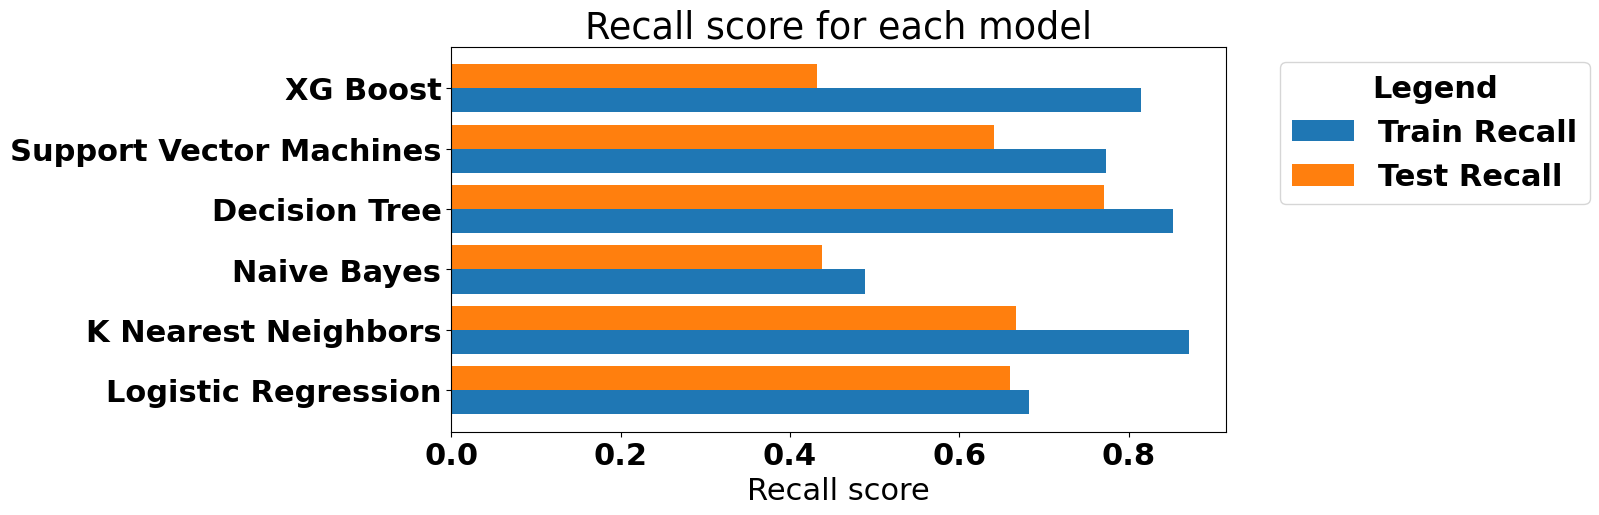

In [522]:
#Plotting Recall scores
ML_models = ['Logistic Regression','K Nearest Neighbors','Naive Bayes','Decision Tree','Support Vector Machines', 'XG Boost']
train_recalls = [lr_train_recall,knn_train_recall,nb_train_recall,dt_train_recall,svm_train_recall, xgb_train_recall]
test_recalls = [lr_test_recall,knn_test_recall,nb_test_recall,dt_test_recall,svm_test_recall, xgb_test_recall]

X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')

plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

The decision tree model has the highest train and test recall score compared to other models built.

## **Conclusions:**

- The given dataset of cardiovascular risk prediction consists of 3390 rows and 17 different columns which include behavioral, demographic, and medical (current and past) factors that might play a role in predicting future risk of cardiovascular disease.

- The missing values were either replaced with median or mode values, respectively.

- Since there are 304(more number) missing values in the glucose column, filling the null values with either mean or mode will return a biased result. Hence to avoid biased results, KNN imputation can be performed.

- Our target variable (future risk of CHD) correlates positively with age, pulse pressure, and prevalent hypertension.

- Only ~15% (around 500 patients) of the patients in the study were eventually exposed to the risk of Cardiac Heart Disease(CHD) and the rest of the patients were not exposed to CHD after the end of the 10-year study.

- Individuals aged above 45 years pose a comparatively higher risk of CHD.

- The higher the systolic and diastolic BP, the higher the risk of incidence of cardiovascular diseases.

- As the education level increases, the incidence of cardiovascular diseases decreases.

- Almost males and females have a similar risk of future incidence of CHD. Prevalent hypertension increases the chances of developing CVDs.

- The higher the pulse pressure, the larger the risk of developing cardiovascular disease.

- Predicting the risk of coronary heart disease is critical for reducing fatalities caused by this illness. We can avert deaths by taking the required medications and precautions if we can foresee the danger of this sickness ahead of time.

- The model we develop must have a high recall score. It is OK if the model incorrectly identifies a healthy patient as a high-risk patient because it will not result in death, but if a high-risk patient is incorrectly labeled as healthy, it may result in fatality.

- We were able to create a model with a recall of just 0.77 because of limited data available and limited computational power available. A recall score of 0.77 indicates that out of 100 individuals with the illness, our model will be able to classify only 77 as high-risk patients, while the remaining 33 will be misclassified.

- Future developments must include a strategy to improve the model recall score, enabling us to save even more lives from this disease. This includes involving more people in the study, and include people with different medical history.

- According to our analysis, the age of the person was the most important feature in determining the risk of a patient getting infected with CHD, followed by pulse pressure, prevalent hypertension, and total cholesterol. Diabetes, prevalent stroke, and BP medication were the least important features in determining the risk of CHD.

- From the analysis, it is found that the age of the person is the most important feature in predicting the future risk of developing Cardiovascular Disease, followed by pulse pressure, prevalent hypertension, and total cholesterol.